# DSTS Assignment 1

### Alan Gaugler
### U885853
### 30/09/2023


## <span style="color:darkblue">Part A - Importing and Understanding Data</span>

First the dataset will be loaded and it will be checked to ensure its integrity and our understanding of the data.

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import joblib # This will be used to export the models

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ensure the file is loaded into the same working directory as this Jupyter Notebook
df = pd.read_csv('zomato_df_final_data.csv')

**Load the dataset**

In [3]:
# Set the display to all columns
pd.set_option('display.max_columns', None)

In [4]:
# View The header file
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

**Observations**<br>
1. I would expect that many of these features have unique values for every row or restaurant. For example, the address should be unique, so I would expect to see 10,500 unique addresses, phone numbers, links and titles (names). Perhaps some restaurant could have the same name or be part of a chain. Maybe some restaurants are in the same address, i.e. in a mall, and some have listed their phone number to a central branch if it is a big chain. Perhaps some of this information is incorrect or missing and it has not been filled out with a NaN or blank.<br>
2. There are 1759 unique values for Cuisine. This is an incredibly large amount. Inspecting the header, it can be seen that many of these restaurants have multiple categories of cuisine. They will need to be separated before modelling.

### <span style="color:darkblue">1 - Provide plots/graphs to support:</span>


#### <span style="color:darkblue">Part A - 1a. How many unique cuisines are served by Sydney restaurants?
As mentioned above, the unique cuisines need to be separated and identified.</span>

In [5]:
df.head(2)

address  cost  \
0                   371A Pitt Street, CBD, Sydney  50.0   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   

                type   votes  groupon    color    cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
1           ['Café']  3236.0    False  #9c3203  7.560976       #6f706b

In [6]:
df['cuisine']

0         ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']
1        ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']
2                                       ['Japanese']
3                              ['Modern Australian']
4                                  ['Thai', 'Salad']
                            ...                     
10495                                    ['Chinese']
10496                                  ['Beverages']
10497                                      ['Sushi']
10498                                      ['Sushi']
10499                                       ['Thai']
Name: cuisine, Length: 10500, dtype: object

In [7]:
df['cuisine'].dtype

dtype('O')

In [8]:
df['cuisine'].nunique()

1759

With all the combinations of various types of cuisines there are 1759 unique combinations. This is a very wide variety.

In [9]:
# This is generally a string. I will convert it into a list
df['cuisines'] = df['cuisine'].str.replace("[", "", regex=False).str.replace("]", "", regex=False).str.replace("'", "", regex=False).str.split(", ")

In [10]:
# Create a new column for the number of cuisine types a restaurant offers. All nan values are set to length 0
df['number_of_cuisines'] = df['cuisines'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [11]:
df['number_of_cuisines'].value_counts()

1    5838
2    3540
3     905
4     142
5      32
8      19
7      14
6      10
Name: number_of_cuisines, dtype: int64

Just over half the restaurants offer just one type of cuisine and 3540 offer two types. The amount of cuisines tapers off rapidly. 19 restaurants offer 8 types of cusine.

In [12]:
cuisine_list = []
cuisine_list_all = [] # cuisine_list_all will be used later in the EDA section
for cuisines in df['cuisines']:
    for cuisine in cuisines:
        cuisine_list_all.append(cuisine)
        if cuisine not in cuisine_list:
            cuisine_list.append(cuisine)
    
print(cuisine_list)

['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean', 'Cafe', 'Coffee and Tea', 'Salad', 'Poké', 'Japanese', 'Modern Australian', 'Thai', 'Desserts', 'Cantonese', 'Chinese', 'Yum Cha', 'Sushi', 'Ramen', 'Malaysian', 'Taiwanese', 'Seafood', 'Asian', 'Italian', 'Steak', 'French', 'Singaporean', 'European', 'Mexican', 'Bar Food', 'American', 'Burger', 'Lebanese', 'Bakery', 'Grill', 'Pizza', 'Vietnamese', 'Cuban', 'Latin American', 'Irish', 'Healthy Food', 'Australian', 'Fusion', 'Patisserie', 'Juices', 'Vegetarian', 'Japanese BBQ', 'Spanish', 'Dumplings', 'Indonesian', 'Indian', 'Tapas', 'Turkish', 'Vegan', 'Shanghai', 'Tea', 'Caribbean', 'Sandwich', 'Fast Food', 'Middle Eastern', 'German', 'Mediterranean', 'Pho', 'Greek', 'Beverages', 'Kebab', 'Fish and Chips', 'Moroccan', 'Pakistani', 'Sri Lankan', 'Pub Food', 'Contemporary', 'Teriyaki', 'Meat Pie', 'British', 'Brasserie', 'Belgian', 'Austrian', 'Hungarian', 'Swiss', 'Charcoal Chicken', 'Brazilian', 'African', 'Israeli', 'Sichuan', 'Street Food', 

In [13]:
print(f'The number of unique cuisines in the restaurants is: {len(cuisine_list)}')

The number of unique cuisines in the restaurants is: 134


There are 134 unique types of cuisine in the dataset of Sydney restaurants.

#### <span style="color:darkblue">Part A - 1b. Which suburbs (top-3) have the highest number of restaurants?</span>

In [14]:
df['subzone'].value_counts().head(3)

CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64

The three suburbs (top 3) with the highest number of restaurants are listed above. Not surprisingly is the CBD which has the largest population density and is full of businesses. Parramatta also has a large CBD.

In [15]:
df['subzone'].nunique()

572

There are a total of 572 subzones or suburbs in the dataset. This is a very extensive list for NSW.

#### <span style="color:darkblue">Part A - 1c. “Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive”. - Confirm or Deny this statement!!</span>

First I want to determine the difference between the two features cost and cost_2.

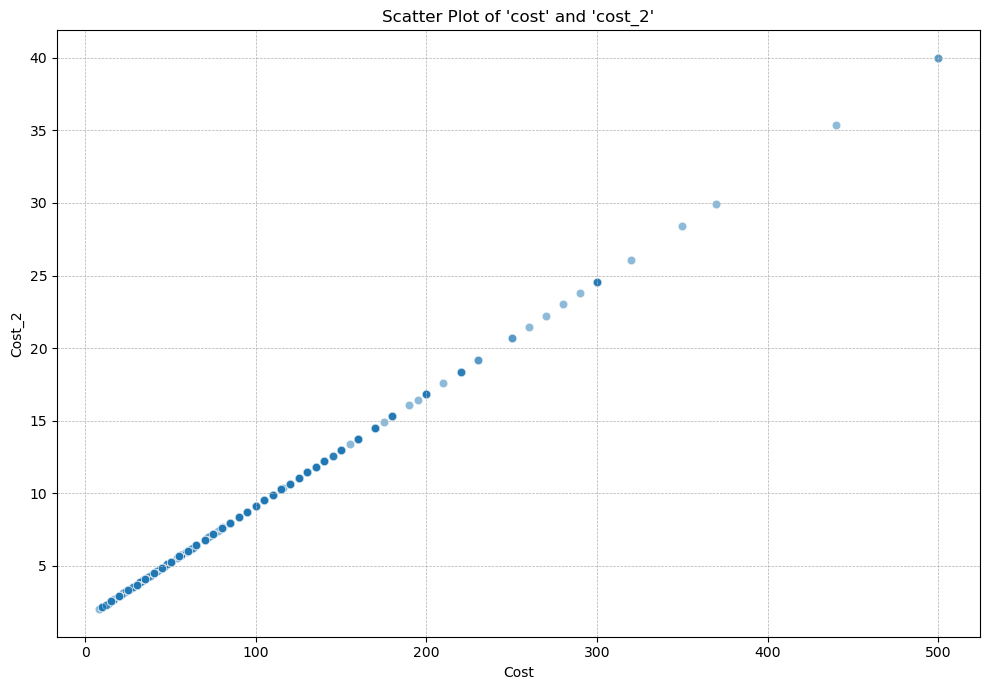

In [16]:
# Plot a scatter plot to observe the relationship between the features 'cost' and 'cost_2'
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='cost', y='cost_2', alpha=0.5)
plt.title("Scatter Plot of 'cost' and 'cost_2'")
plt.xlabel("Cost")
plt.ylabel("Cost_2")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [17]:
df['cost'].corr(df['cost_2'])

0.9999999999999996

The scatter plot shows a perfect linear relationship between cost and cost 2. The largest point is cost 500 and cost_2 of 40. It seems like:  
**cost_2 = cost / 12.5**  
The correlation of 0.999999 confirms this. As they appear to represent the same cost exactly, it appears cost 2 has been normalized and it does not provide any further information to the dataset. It will be removed before modelling and it will not be used to answer this question.  
Next, we need to determine restaurant costs. I will make 4 price categories as follows:  
- **Cheap**: less than $35  

- **Normal**: between 35 and $55  

- **Expensive**: between 55 and $90  

- **Very Expensive**: above $90  

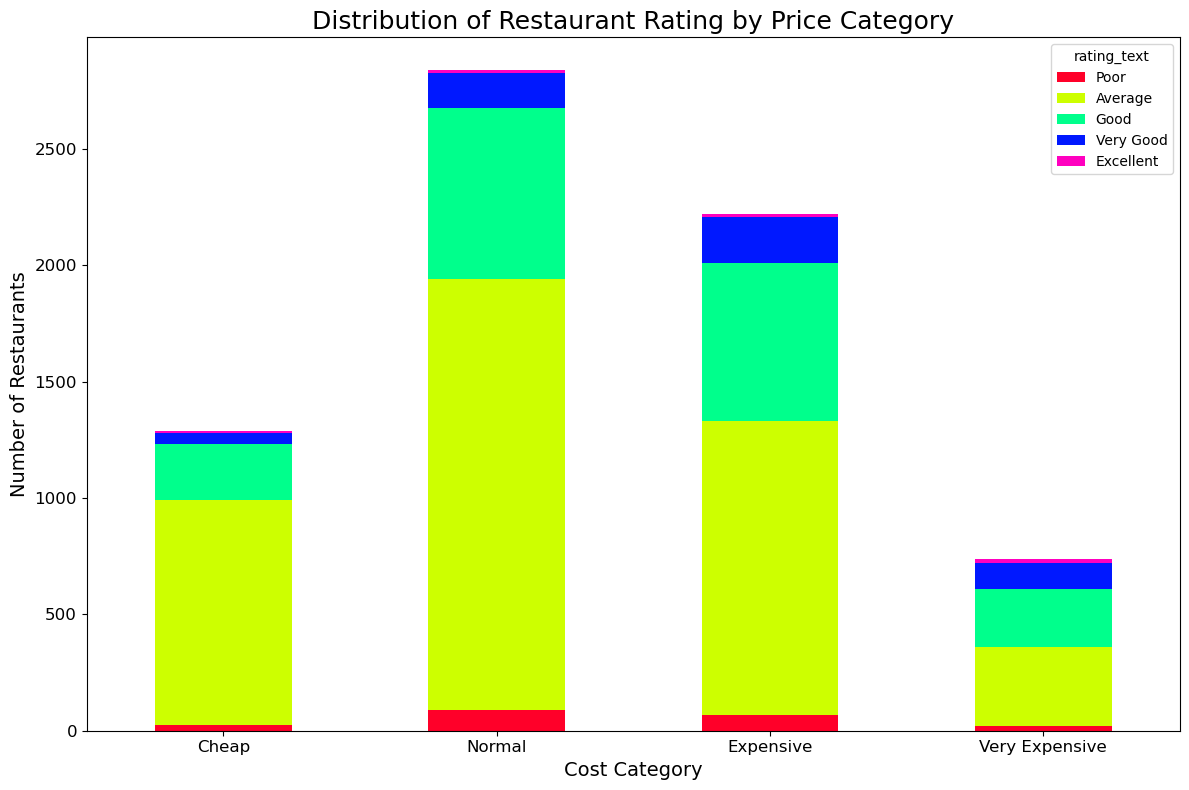

In [18]:
# Categorize the costs into 4 price categories
cost_bins = [0, 35, 55, 90, 501]  
cost_labels = ['Cheap', 'Normal', 'Expensive', 'Very Expensive']
df['price_category'] = pd.cut(df['cost'], bins=cost_bins, labels=cost_labels, right=False)

column_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']

# Create a cross table to count the number of restaurants for each combination of cost_category and rating_text
cross_table = pd.crosstab(df['price_category'], df['rating_text'])[column_order]

# Plot the stacked bar chart with cost category on the x axis, stacked by rating
ax = cross_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='gist_rainbow')
plt.title("Distribution of Restaurant Rating by Price Category", fontsize=18)
plt.ylabel("Number of Restaurants", fontsize=14)
plt.xlabel("Cost Category", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The plot above shows there are very few restaurants given a Poor or an Excellent rating compared to Average, Good and Very Good. Because of this it is hard to visualize the distribution of these extreme ratings. They can be represented by numbers in the tables below:

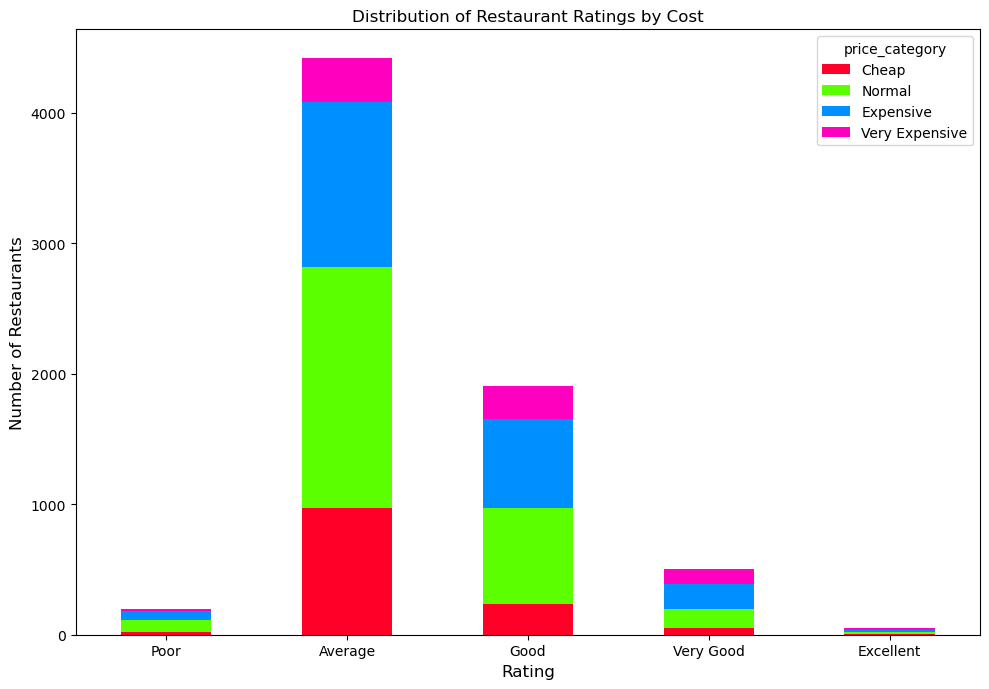

In [19]:
# Create a cross table with 'rating_text' as rows and 'price_category' as columns
ct_rating = pd.crosstab(df['rating_text'], df['price_category'])

# Use the desired row order for plotting
row_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
ct_rating = ct_rating.reindex(row_order)

# Plot the stacked bar chart with rating on the x-axis, stacked by price category
ax = ct_rating.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='gist_rainbow')
plt.title("Distribution of Restaurant Ratings by Cost")
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xlabel("Rating", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The plot above shows there are very few restaurants that were given a Poor or an Excellent rating compared to Average, Good and Very Good. Because of this, it is hard to visualize the distribution of these extreme ratings. They can be better represented by tables of numbers as follows:

In [20]:
# Create a table with rating percentages for each price category
cross_table_pct = round(cross_table.divide(cross_table.sum(axis=1), axis=0)*100,1)
cross_table_pct2 = round(cross_table.divide(cross_table.sum(axis=0), axis=1)*100,1)

In [21]:
# Display the number of ratings in each price category
cross_table

rating_text     Poor  Average  Good  Very Good  Excellent
price_category                                           
Cheap             24      968   239         48          9
Normal            89     1852   734        150         12
Expensive         66     1263   682        194         14
Very Expensive    22      337   248        114         16

In [22]:
# Display the percentage of ratings in each price category
# The sum of the rows add up to 100%
cross_table_pct

rating_text     Poor  Average  Good  Very Good  Excellent
price_category                                           
Cheap            1.9     75.2  18.6        3.7        0.7
Normal           3.1     65.3  25.9        5.3        0.4
Expensive        3.0     56.9  30.7        8.7        0.6
Very Expensive   3.0     45.7  33.6       15.5        2.2

In [23]:
# Display the percentage of ratings in each price category
# The sum of the columns add up to 100%
cross_table_pct2

rating_text     Poor  Average  Good  Very Good  Excellent
price_category                                           
Cheap           11.9     21.9  12.6        9.5       17.6
Normal          44.3     41.9  38.6       29.6       23.5
Expensive       32.8     28.6  35.8       38.3       27.5
Very Expensive  10.9      7.6  13.0       22.5       31.4

The first table above shows the number of resaurants that received eacch rating of the four price categories.  The second table shows the percentage of rating by price category, where each row adds up to 100%.  
The third table shows percentage of price category by rating, in which each column adds up to 100%.  
To verify the statement **Restaurants with ‘excellent’ rating are mostly very expensive**, the answer is a clear no. Only 16 restaurants with an Excellent rating are 'Very Expensive'. This represents 31.4% of all excellent ratings. A very expensive restaurant is more likely to get an excellent rating than in the other price categories, but with only 2.2% gaining an "Excellent' rating, this chance is still extremley low.  
To verify the statement **Restaurants with a ‘Poor’ rating are rarely expensive**, it can be observed that with my estimate of an expensive and very expensive restaurant that 66 and 22 were rated poor respectively. These numbers are inline with the numbers of restaurants in these categories. For the price categories of normal, expensive and very expensive about 3% of ratings were given as poor, which is a very low number. It was even lower for cheaper restaurants at 1.9%. This could be possibly explained by customers in cheaper restaurants have lower expectations.

### <span style="color:darkblue">2 - Perform exploratory analysis</span>

The original dataset consists of 17 columns of various data types and categories. These will be analyzed in more detail to gain insights into the data. As can be seen below, I have added more columns to help with the analysis and more will continue to be added.

In [24]:
# Check the datatypes of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   address             10500 non-null  object  
 1   cost                10154 non-null  float64 
 2   cuisine             10500 non-null  object  
 3   lat                 10308 non-null  float64 
 4   link                10500 non-null  object  
 5   lng                 10308 non-null  float64 
 6   phone               10500 non-null  object  
 7   rating_number       7184 non-null   float64 
 8   rating_text         7184 non-null   object  
 9   subzone             10500 non-null  object  
 10  title               10500 non-null  object  
 11  type                10452 non-null  object  
 12  votes               7184 non-null   float64 
 13  groupon             10500 non-null  bool    
 14  color               10500 non-null  object  
 15  cost_2              10154 non-null  

Most columns are either floats or strings (represented by type 'object' in Pandas). There is also one boolean value.

In [25]:
# Display descriptive statistical data for the numeric columns.
df.describe()

cost           lat           lng  rating_number        votes  \
count  10154.000000  10308.000000  10308.000000    7184.000000  7184.000000   
mean      51.153240    -32.921377    148.067359       3.283672    83.581013   
std       27.799485      8.263449     26.695402       0.454580   175.117966   
min        8.000000    -37.858473   -123.270371       1.800000     4.000000   
25%       30.000000    -33.899094    151.061061       3.000000    12.000000   
50%       45.000000    -33.872741    151.172468       3.300000    32.000000   
75%       60.000000    -33.813451    151.208940       3.600000    87.000000   
max      500.000000     51.500986    152.869052       4.900000  3236.000000   

             cost_2  number_of_cuisines  
count  10154.000000        10500.000000  
mean       5.332974            1.587714  
std        2.147115            0.817014  
min        2.000000            1.000000  
25%        3.699187            1.000000  
50%        4.857724            1.000000  
75%        6.016260            2.000000  
max       40.000000            8.000000

In [26]:
# Find the number of missing values for each variable
df.isna().sum()

address                  0
cost                   346
cuisine                  0
lat                    192
link                     0
lng                    192
phone                    0
rating_number         3316
rating_text           3316
subzone                  0
title                    0
type                    48
votes                 3316
groupon                  0
color                    0
cost_2                 346
cuisine_color            0
cuisines                 0
number_of_cuisines       0
price_category         346
dtype: int64

Several columns have some missing values. These will be looked at individually and treated appropriately before predictive modelling.

<span style="color:darkblue">**Cost**</span>

In [27]:
# Show the number of missing values
df['cost'].isna().sum()

346

There are 346 missing values of cost. The is just an observation for the Exploratory Data Analysis stage, but it will be dealt with in the Feature Engineering stage.

In [28]:
# Descriptive statistics of 'cost'
df['cost'].describe()

count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64

Looking above at the descriptive statistics of 'cost'.  

Count: There are 10,154 entries for the cost out of 10,500 rows. Obviosuly there are some missing values in the very important feature of 'cost' here.  

Mean: The average cost for a meal for two people in Sydney's restaurants is $51.15.  

Std: The standard deviation is approximately $27.80, indicating the spread of the data from the mean.  

Min: The minimum price for a meal is $8 for two people. This is very cheap. It must have been just a snack and drink.  

Median: Half of the restaurants have a cost less than or equal to $45.  

Max: The maximum cost for a meal for two people was $500. This is very expensive.

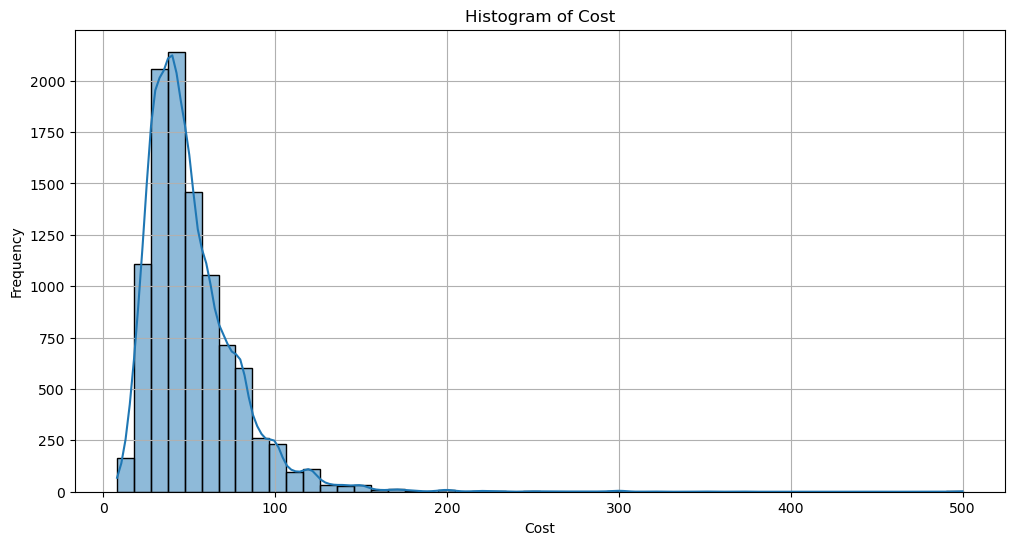

In [29]:
# Plot the histogram 'Cost'
plt.figure(figsize=(12, 6))
sns.histplot(df['cost'], kde=True, bins=50)
plt.title("Histogram of Cost")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Looking above at the histogram of 'cost'. It is clearly skewed to the right. The maximum price is $500 for a meal for two people.

There are very few meals that cost over $150.

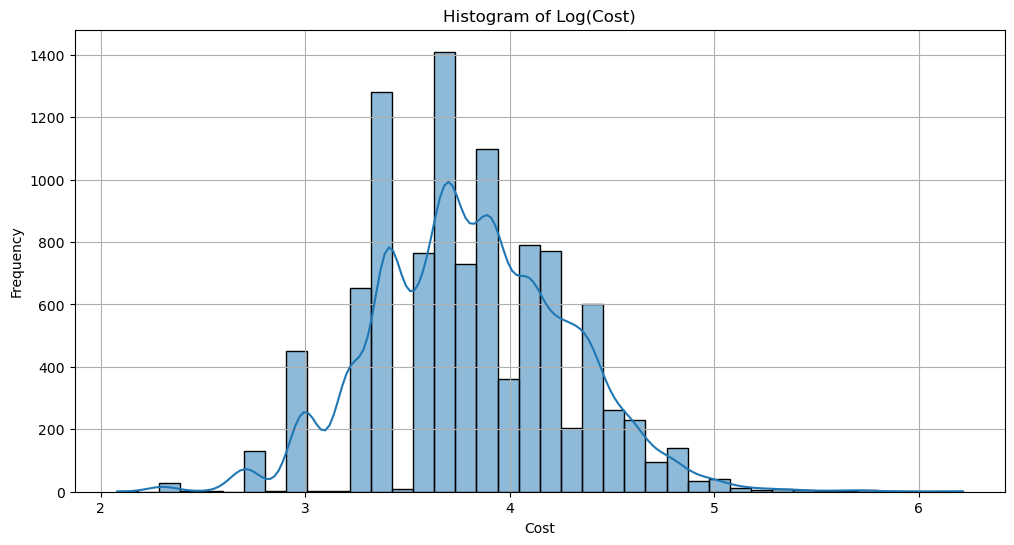

In [30]:
# Plot the histogram natural log of 'Cost'
plt.figure(figsize=(12, 6))
sns.histplot(np.log(df['cost']), kde=True, bins=40)
plt.title("Histogram of Log(Cost)")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The natural log of the 'cost' is a much more normal and symmetrical distribution, although there are gaps.

<span style="color:darkblue">**Rating**</span>

In [31]:
# Show the number of missing values
df['rating_number'].isna().sum(), df['rating_text'].isna().sum()

(3316, 3316)

There are 3316 missing values of 'rating_number' and 'rating_text'. This is a significant amount for 10,500 entries. The is just an observation for the EDA stage but it will be dealt with in the Feature Engineering stage.

In [32]:
df['rating_number'].describe()

count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64

Looking above at the descriptive statistics for 'rating_number'.  

Count: There are 7184 entries for the 'rating_number' out of 10,500 rows. Obviosuly there are several (3316) missing values of 'rating_number' here.  

Mean: The average rating for a meal in Sydney's restaurants is 3.28 on a rating of 1 to 5.  

Std: The standard deviation is approximately 0.455, indicating the spread of the data from the mean.  

Min: The minimum rating given in this dataset for any restaurant is 1.8. This is surprising. I would expect there to be some restaurants rated lower. Perhaps if they were any worse, they would rapidly be out of business.  

Median: The median rating of 3.30 is very close to the mean. This is not surprising as the maximum value than can be given is capped to 5. This indicates a fairly normal distribution.  

Max: The maximum value attainable of 5.0. The maximum rating for a restaurant in this dataset is 4.9. This is an excellent score.

In [33]:
df['rating_text'].describe()

count        7184
unique          5
top       Average
freq         4501
Name: rating_text, dtype: object

In [34]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Poor', nan],
      dtype=object)

There are five possible ratings as well as missing values. 'Average' is the most common rating.

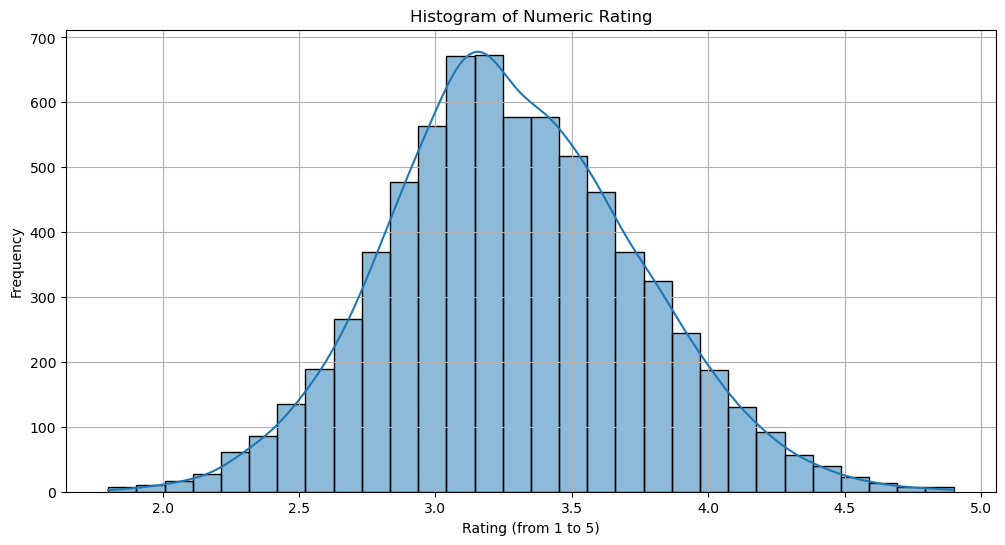

In [35]:
# Plot the histogram 'rating_number'
plt.figure(figsize=(12, 6))
sns.histplot(df['rating_number'], kde=True, bins=30)
plt.title("Histogram of Numeric Rating")
plt.xlabel("Rating (from 1 to 5)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The distribution of 'rating_number' showes a close to normal distribution centred at 3.3.  
Very few restaurants have a rating lower than 2.5 or more than 4.1.  
A stacked bar chart for text rating has already been shown above. It shows the counts for each of the five ratings.

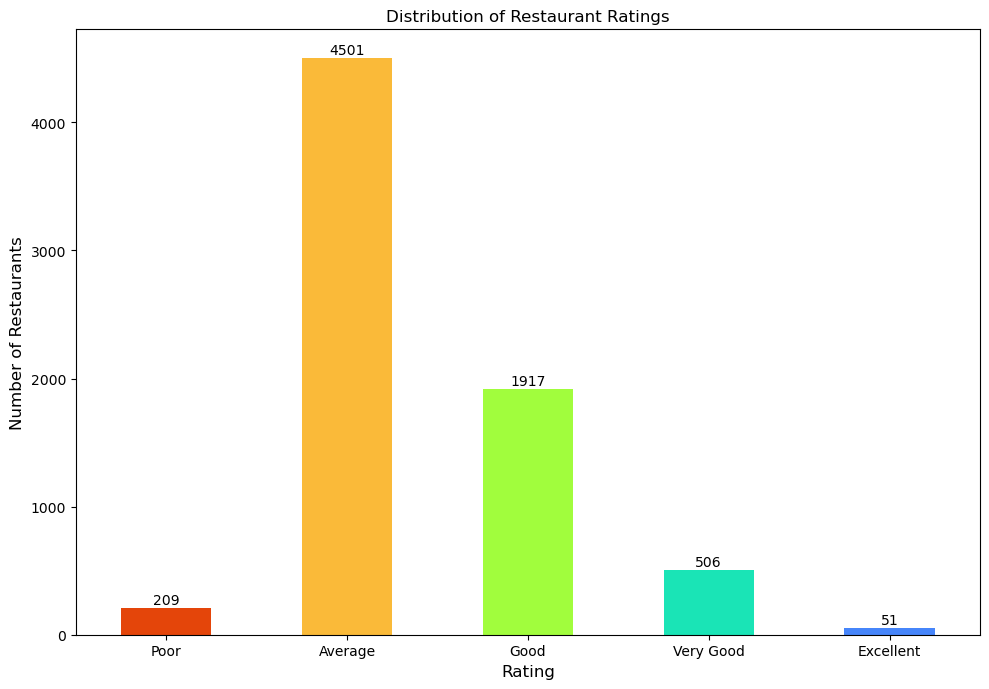

In [36]:
# Use the desired row order for plotting
row_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
text_rating = df['rating_text'].value_counts().reindex(row_order)

# Plot the bar chart with rating on the x-axis, stacked by price category
ax = text_rating.plot(kind='bar', figsize=(10, 7), color=sns.color_palette("turbo_r", len(text_rating)))
plt.title("Distribution of Restaurant Ratings")
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xlabel("Rating", fontsize=12)
plt.xticks(rotation=0)
# Display the value count above each bar
for index, value in enumerate(text_rating.values):
    ax.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

Similar to what was shown previously, this is a distribution of rating. There are very few Poor and Excellent ratings. Average is by far the most common rating followed by Good. This indicates that most restaurants are like what the customers were expecting of them.

<span style="color:darkblue">**Type**</span>

This is the type of restaurant.

In [37]:
# Show the number of missing values
df['type'].isna().sum()

48

There are 48 missing values of restaurant type. The is just an observation for the EDA stage but it will be dealt with in the Feature Engineering stage.

In [38]:
df['type'].describe()

count                 10452
unique                   66
top       ['Casual Dining']
freq                   4854
Name: type, dtype: object

In [39]:
df['type'].nunique(), df['type'].unique()

(66,
 array(["['Casual Dining']", "['Café']", "['Fine Dining']",
        "['Fine Dining', 'Bar']", "['Casual Dining', 'Dessert Parlour']",
        "['Fine Dining', 'Wine Bar']", "['Casual Dining', 'Wine Bar']",
        "['Casual Dining', 'Bar']", "['Fast Food']", "['Café', 'Bakery']",
        "['Casual Dining', 'Café']", "['Bar']",
        "['Bakery', 'Dessert Parlour']", "['Bar', 'Wine Bar']",
        "['Food Court']", "['Dessert Parlour', 'Café']",
        "['Bar', 'Casual Dining']", "['Bakery', 'Pub']",
        "['Café', 'Casual Dining']", "['Café', 'Bar']",
        "['Casual Dining', 'Pub']", "['Bakery', 'Café']", "['Food Truck']",
        "['Café', 'Dessert Parlour']", "['Dessert Parlour']", "['Pub']",
        nan, "['Pub', 'Casual Dining']", "['Dessert Parlour', 'Bakery']",
        "['Café', 'Wine Bar']", "['Pub', 'Wine Bar']",
        "['Food Court', 'Casual Dining']", "['Wine Bar', 'Casual Dining']",
        "['Casual Dining', 'Food Court']", "['Club', 'Bar']",
        "['Casua

In [40]:
df['type'].value_counts()

['Casual Dining']                    4854
['Café']                             2767
['Fast Food']                         557
['Food Court']                        480
['Pub']                               284
                                     ... 
['Club', 'Casual Dining']               1
['Dessert Parlour', 'Fast Food']        1
['Dessert Parlour', 'Food Court']       1
['Club', 'Pub']                         1
['Food Court', 'Beverage Shop']         1
Name: type, Length: 66, dtype: int64

Looking above, there are 66 unique types of restaurants. Viewing these unique types, many of these are combinations of two dining types. They shall be split to determine the counts of all individual types.

In [41]:
df['type']

0             ['Casual Dining']
1                      ['Café']
2               ['Fine Dining']
3        ['Fine Dining', 'Bar']
4             ['Casual Dining']
                  ...          
10495         ['Casual Dining']
10496                   ['Bar']
10497            ['Food Court']
10498            ['Food Court']
10499         ['Casual Dining']
Name: type, Length: 10500, dtype: object

In [42]:
df['type'].dtype

dtype('O')

In [43]:
# This is a string. I will make it onto a list
df['rest_type_list'] = df['type'].str.replace("[", "", regex=False).str.replace("]", "", regex=False).str.replace("'", "", regex=False).str.split(", ")

In [44]:
# Create a new column for the number of types a restaurant is. All nan values are set to length 0
df['number_of_types'] = df['rest_type_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [45]:
df['number_of_types'].value_counts()

1    9457
2     995
0      48
Name: number_of_types, dtype: int64

9457 restaurants are of one type only and 995 claim to be of two types. This is 9.5% of all restaurants. The 48 restaurants of type 0 are the 48 nans determined above. No restaurant is of three types or more.

In [46]:
#df['rest_type_list] = df['types']
# Fill NaN values with empty lists
df['rest_type_list'] = df['rest_type_list'].apply(lambda x: x if isinstance(x, list) else [])

# Extract unique restaurant types into a list
restaurant_types = []
types_all = []
for rest_type in df['rest_type_list']:
    for restaurant in rest_type:
        types_all.append(restaurant)
        if restaurant not in restaurant_types:
            restaurant_types.append(restaurant)
    
print(restaurant_types)

['Casual Dining', 'Café', 'Fine Dining', 'Bar', 'Dessert Parlour', 'Wine Bar', 'Fast Food', 'Bakery', 'Food Court', 'Pub', 'Food Truck', 'Club', 'Beverage Shop', 'Food Stall']


In [47]:
print(f'The number of unique restaurant types are: {len(restaurant_types)}')

The number of unique restaurant types are: 14


There are 14 unique types of restaurants but 66 combinations of 1 or 2 of these unique types in the dataset.

**Show the number of Unique Types**

This will total more than the number of rows, as some types were multiple.

In [48]:
types_all = pd.Series(types_all)
# Show the value counts
types_all.value_counts()

Casual Dining      5566
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
dtype: int64

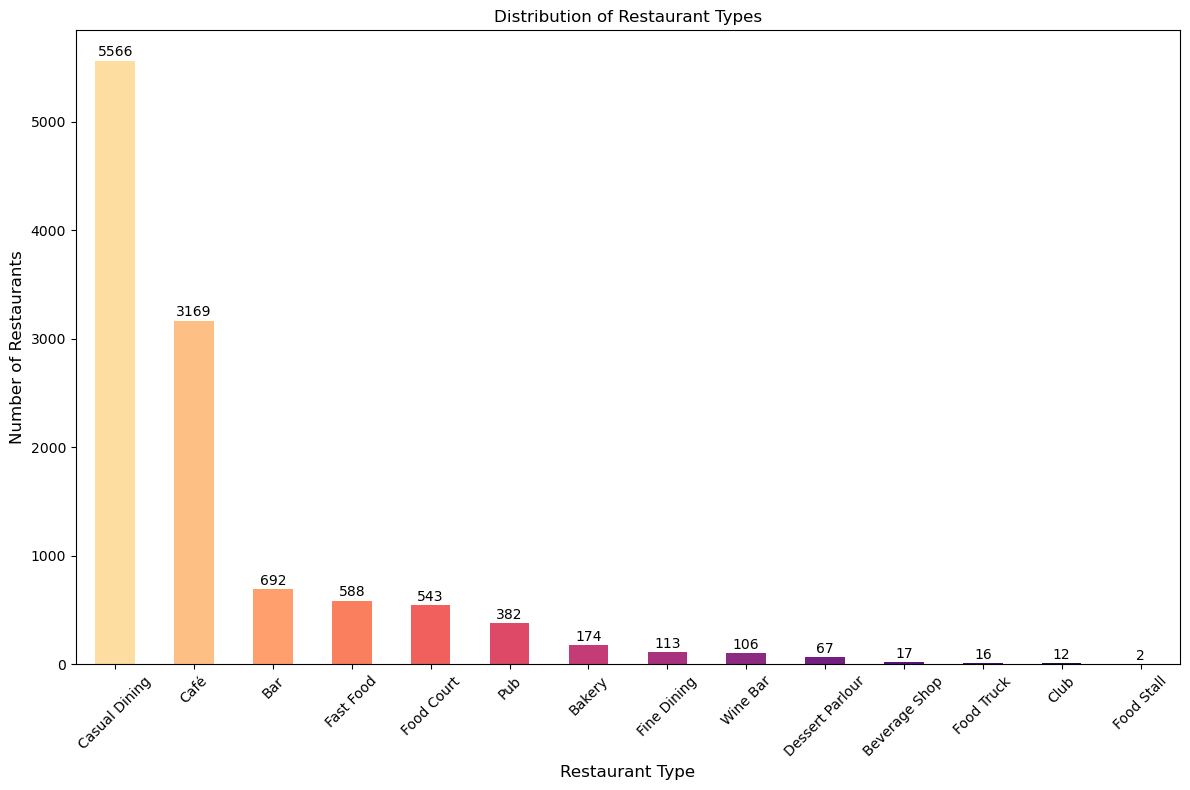

In [49]:
# Let's visualize this
# Get the value counts
type_counts = types_all.value_counts()

# Plot the restaurant types
ax = type_counts.plot(kind='bar', figsize=(12, 8), color=sns.color_palette("magma_r", len(type_counts)))
plt.title("Distribution of Restaurant Types")
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xlabel("Restaurant Type", fontsize=12)
plt.xticks(rotation=45)

# Display the value count above each bar
for index, value in enumerate(type_counts.values):
    ax.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

After separating all the multiple types of restaurant combinations, it can be seen that Casual Dining and Cafe are by far the most common types. There are only 2 Food Stalls in the dataset. Again it must be noted that 995 restaurants represented themselves as two types.

<span style="color:darkblue">**Cuisine**</span>  
Many resturants offer multiple cuisine types as was determined earlier. We shall plot the most common types here.

In [50]:
cuisine_types_all = pd.Series(cuisine_list_all)
# Show the value counts
cuisine_types_all.value_counts()

Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Length: 134, dtype: int64

In [51]:
top_30_cuisines = cuisine_types_all.value_counts()[:30]

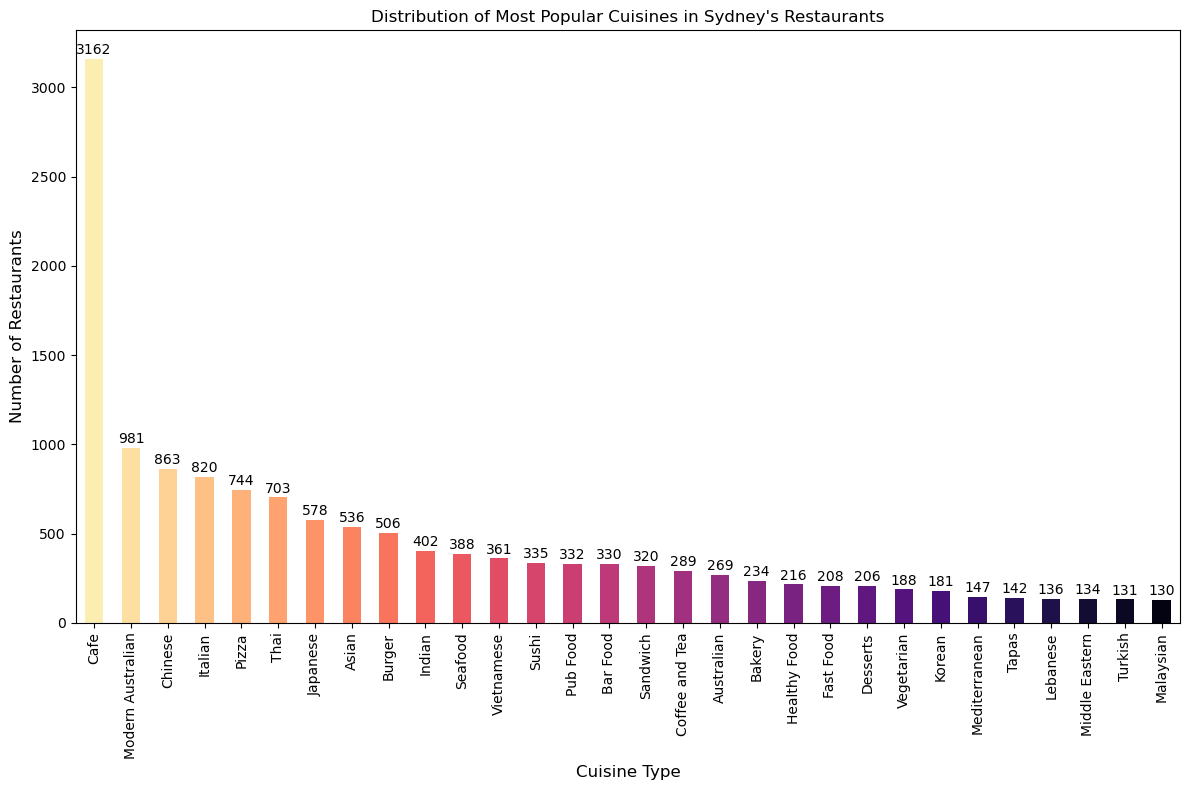

In [52]:
# Let's visualize this

# Plot the restaurant types
ax = top_30_cuisines.plot(kind='bar', figsize=(12, 8), color=sns.color_palette("magma_r", len(top_30_cuisines)))
plt.title("Distribution of Most Popular Cuisines in Sydney's Restaurants")
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xlabel("Cuisine Type", fontsize=12)
plt.xticks(rotation=90)

# Display the value count above each bar
for index, value in enumerate(top_30_cuisines.values):
    ax.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

By far the most common type of cuisine is a Cafe, followed by 'Modern Australian'. Some categories appear to be very similar such as "Modern Australian' and 'Australian'. Also 'Pub Food' and 'Bar Food' are virtually the same category.

<span style="color:darkblue">**Subzone/Suburb**</span>  
A bar chart of suburbs with the most and least number of restaurants will be made.

In [53]:
df['subzone'].value_counts()

CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 
The Sydney Boulevard Hotel, Darlinghurst      1
Pullman Quay Grand Sydney Harbour, CBD        1
Chullora                                      1
Marriott Sydney Harbour, Circular Quay        1
Holiday Inn Old Sydney, The Rocks             1
Name: subzone, Length: 572, dtype: int64

In [54]:
top_30_suburbs = df['subzone'].value_counts()[:30]

In [55]:
df['subzone'].value_counts().tail(30)

Art Gallery of New South Wales              1
Mathews Arcade, Kensington                  1
The Hills                                   1
Lord Wolseley Hotel, Ultimo                 1
Sydney Markets Plaza                        1
Pierside Shopping Centre                    1
Four Points by Sheraton, CBD                1
Little Hartley                              1
Hotel Sweeny's, CBD                         1
Jenolan                                     1
Holiday Inn Darling Harbour, Chinatown      1
Rydges North Sydney, North Sydney           1
Novotel Rockford, Darling Harbour           1
Royal Exhibition Hotel                      1
Coogee Legion Club                          1
Cabramatta Plaza                            1
Holiday Inn Parramatta                      1
Primus Hotel                                1
Mercure Sydney Parramatta, Parramatta       1
Martin Place Shopping Circle, CBD           1
City of Sydney RSL Club                     1
3 Weeds, Rozelle                  

Looking above at the suburbs with the least amount of restaurants, we see that they all have a value of 1. Reading the names, we find that they are not actually suburbs or subzones but rather the names of individual hotels or establishments. They have been misclassified and should be corrected with their proper suburb name. This will be left as future work for this project due to time contstraints. It will not have a significant impact on the modelling, but it is worth pointing out.

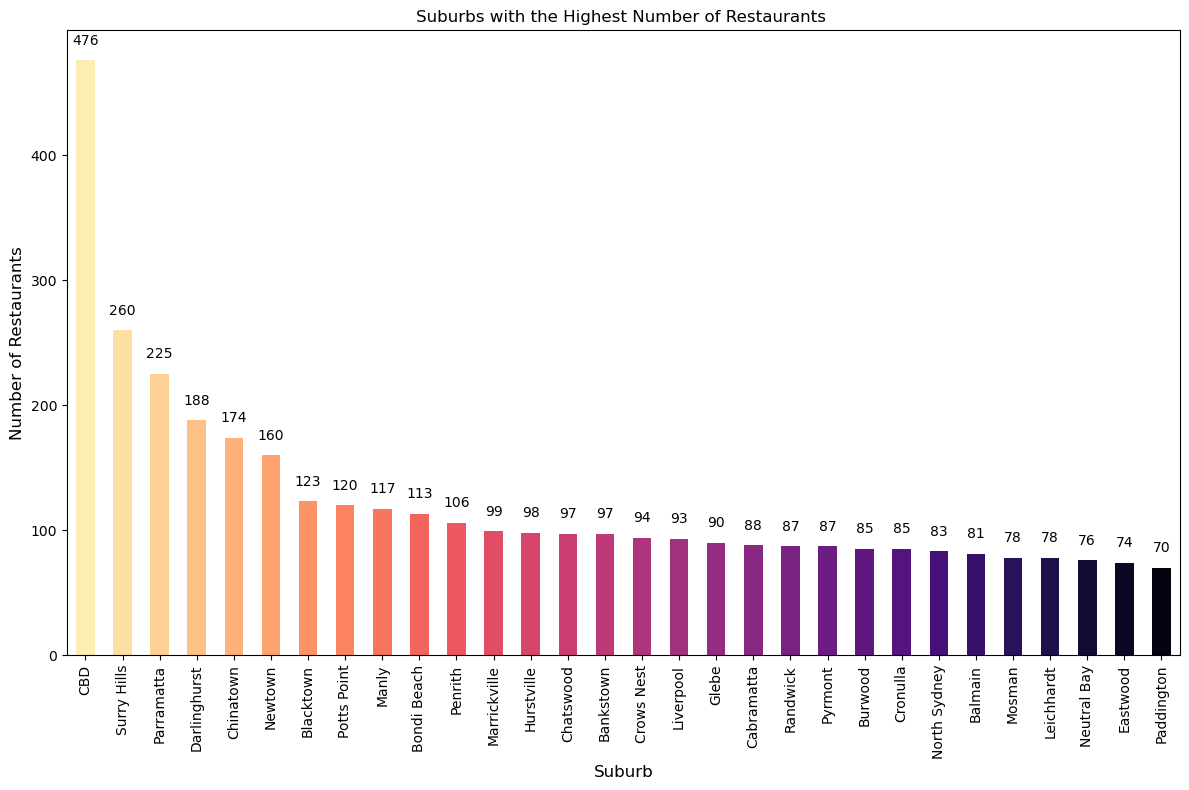

In [56]:
# Visualize the suburbs with most restaurants.

# Plot the restaurant types
ax = top_30_suburbs.plot(kind='bar', figsize=(12, 8), color=sns.color_palette("magma_r", len(top_30_cuisines)))
plt.title("Suburbs with the Highest Number of Restaurants ")
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xlabel("Suburb", fontsize=12)
plt.xticks(rotation=90)

# Display the value count above each bar
for index, value in enumerate(top_30_suburbs.values):
    ax.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

As mentioned earlier, the CBD has by far the most restaurants. It is also by far the most densely packed and busiest suburb of Sydney.

<span style="color:darkblue">**Votes**</span>  
Votes is likely a more important indicator of a restaurant's popularity than the rating. It is likely that a similar proportion of all the clientel of a restaurant will leave a review. Therefore, restaurants with the largest amount of votes are likely the most successful, irrespective of what their average rating is.

In [57]:
# Show the number of missing values
df['votes'].isna().sum()

3316

There are 3316 missing values of votes. This is a large amount for 10,500 entries. The is just an observation for the EDA stage, but it will be dealt with in the Feature Engineering stage.

In [58]:
df['votes'].describe()

count    7184.000000
mean       83.581013
std       175.117966
min         4.000000
25%        12.000000
50%        32.000000
75%        87.000000
max      3236.000000
Name: votes, dtype: float64

Looking above at the descriptive statistics for 'votes'.  

Count: There are 7184 entries for the number of votes out of 10,500 rows. Obviosuly there are several (3316) missing values of votes here.  

Mean: The average number of votes to rate Sydney's restaurants is 83.58 in the given time period.  

Std: The standard deviation is approximately 175.2, indicating the spread of the data from the mean.  

Min: The lowest number of votes is 4. It is either a very unpopular restaurant or it has just recently opened.  

Median: The median number of votes is 32 which is far less than the mean. This indicates that many restaurants are receive far more votes than the median. This distribution will be skewed to the right.  

Max: The highest number of votes is 3236. This "The Grounds of Alexandria Cafe in Alexandria. It is in the price category of Expensive. Obviously, business is very good.

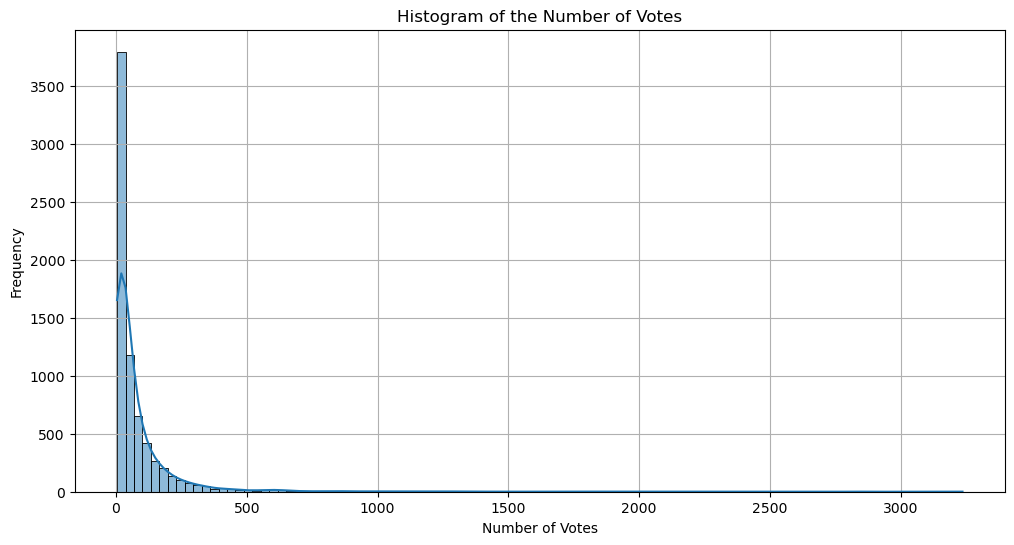

In [59]:
# Plot the histogram 'Votes'
plt.figure(figsize=(12, 6))
sns.histplot(df['votes'], kde=True, bins=100)
plt.title("Histogram of the Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Looking above at the histogram of votes, it is clearly skewed to the right. The vast majority of the restaurants receive fewer than 100 votes. Let's observe the distribution below 500 votes.

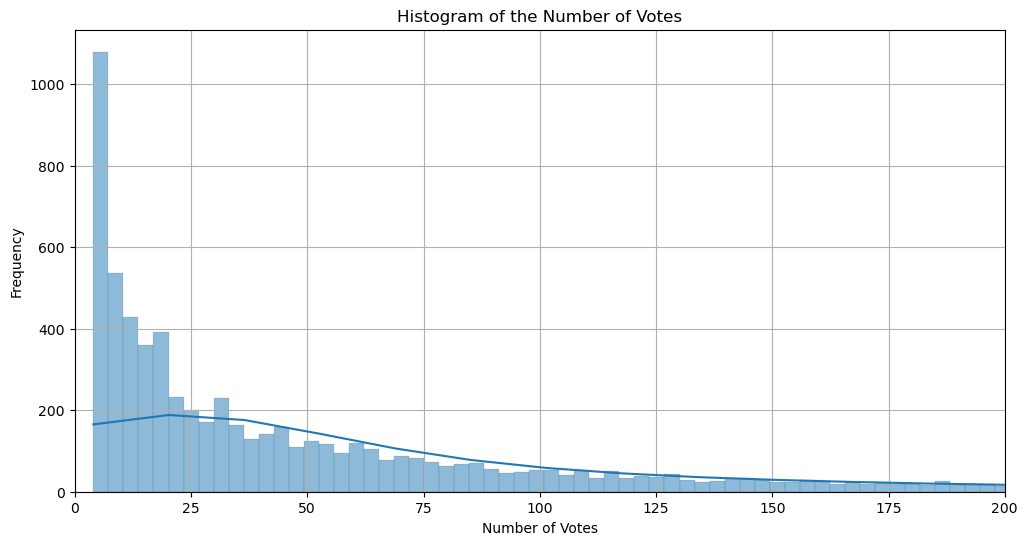

In [60]:
# Plot the histogram 'Votes'
plt.figure(figsize=(12, 6))
sns.histplot(df['votes'], kde=True, bins=1000)
plt.title("Histogram of the Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.grid(True)
plt.xlim(0, 200)  # Set the x-axis limit
plt.show()

Looking in more detail, the largest frequency of the number of votes is clearly very low and it tapers off rapidly in a uniform fashion.

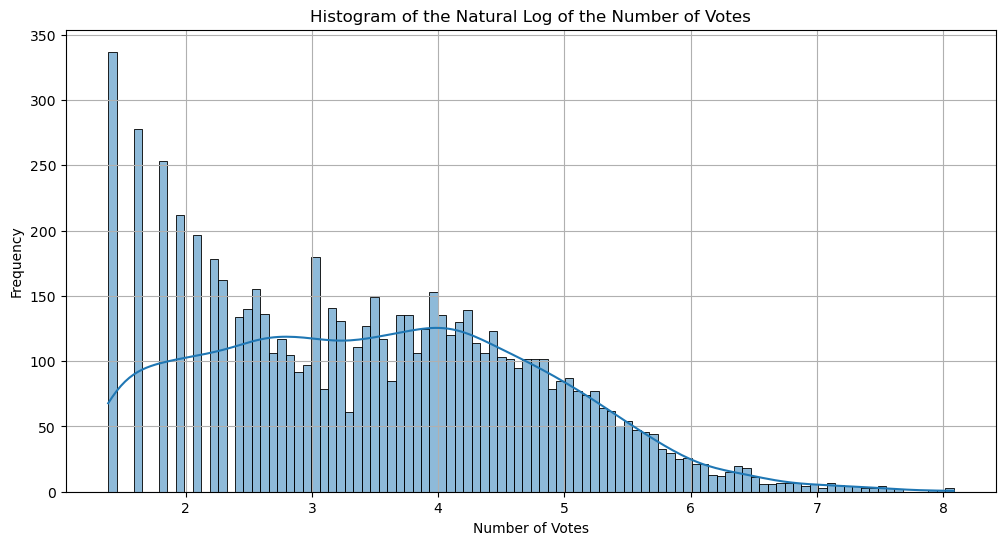

In [61]:
# Plot the histogram of the natural log of 'Votes'
plt.figure(figsize=(12, 6))
sns.histplot(np.log(df['votes']), kde=True, bins=100)
plt.title("Histogram of the Natural Log of the Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The natural log of the votes is still very distorted to the left or the lower number of votes, but after a value of 4, it tapers of in a uniform distribution. It may well be better to model a restaurant by the log of the votes as it is a much more normal distribution.

<span style="color:darkblue">**Groupon**</span>  
This is a boolean feature with True indicating that the establishment has a deal with Groupon and False meaning it doesn't.

In [62]:
# Show the number of missing values
df['groupon'].isna().sum()

0

In [63]:
df['groupon'].value_counts()

False    10378
True       122
Name: groupon, dtype: int64

There are no missing values for groupon and there are only 122 restaurants out of 10,500 that offer Groupon deals. This will likely not have a significant impact on the rating.

<span style="color:darkblue">**Color**</span>  
This is feature seems to be an RGB colour in hexadecimal format.

In [64]:
# Show the number of missing values
df['color'].isna().sum()

0

In [65]:
df['color'].value_counts()

#000000    3316
#fd9a4e     673
#fda25a     672
#fd9243     578
#fb8836     578
#fdab66     564
#f87f2c     517
#fdb475     477
#f57622     462
#fdbd83     369
#f26d17     369
#ed6310     324
#fdc590     266
#e75b0b     245
#fdce9e     189
#e15307     188
#fdd5ab     135
#db4a02     130
#ce4401      92
#fddab6      86
#fee0c1      61
#c14002      57
#b53b02      39
#fee5cc      28
#a83703      22
#feead5      17
#9c3203      14
#feeddc      10
#932f03       7
#892b04       5
#fff1e4       5
#7f2704       3
#fff5eb       2
Name: color, dtype: int64

In [66]:
## df['rating_number'].value_counts()

In [67]:
df['rating_number'].isna().sum()

3316

Color is simply a color code for the rating. Looking above, the distributions for the two variables are exactly the same. 

<span style="color:darkblue">**cuisine_color**</span>  
This is feature also seems to be an RGB colour in hexadecimal format.

In [68]:
# Show the number of missing values
df['cuisine_color'].isna().sum()

0

In [69]:
df['cuisine_color'].value_counts()

#6f706b    8147
#4186f4    1229
#f45042     868
#dee82c     246
#8814b2      10
Name: cuisine_color, dtype: int64

In [70]:
df['rating_text'].value_counts()

Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: rating_text, dtype: int64

I could not determine what this feature with five unique values represents. I inspected it in in Excel; it has no clear correlation with rating_number or rating_text. As I cannot explain the meaning of this variable and it has not been provided, it will be removed.

<span style="color:darkblue">**Distribution of Cost by Restaurant Type**</span> 

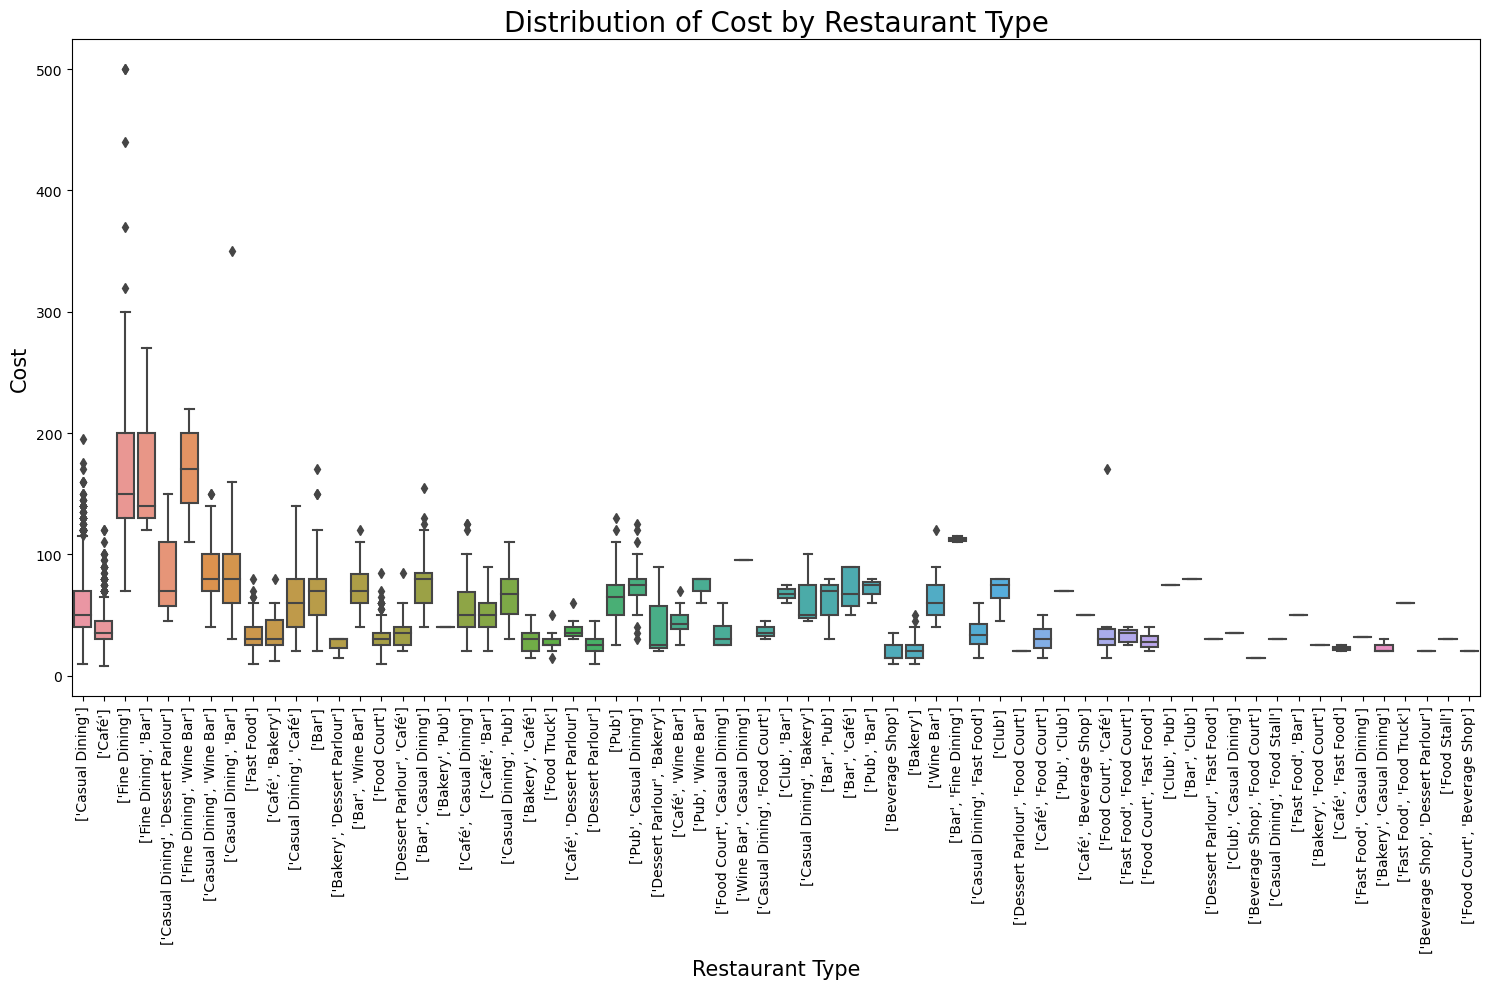

In [71]:
# Plot how Cost varies depending on the type of restaurant.
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='type', y='cost')
plt.xticks(rotation=90)
plt.title("Distribution of Cost by Restaurant Type", fontsize=20)
plt.ylabel("Cost", fontsize=15)
plt.xlabel("Restaurant Type", fontsize=15)
plt.tight_layout()
plt.show()


Looking above, the cost of a meal can vary considerably by restaurant type. Individual or multiple categories involving 'find dining' are clearly more expensive than most other categories, easily exceeding $100 for a meal for two people in most cases. Bakeries and beverage shops are among the cheapest.

### <span style="color:darkblue">3 - Produce Cuisine Density Map</span>

In [72]:
# Import the required libraries
import geopandas as gpd
from shapely.geometry import Point

First the sydney.geojson file must be loaded

In [73]:
# Load "sydney.geojson"
geo_sydney = gpd.read_file('sydney.geojson')

In [74]:
# View the header
geo_sydney.head()

SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   
3    10016             Airds  Very good  2.380773   
4    10022        Alexandria  Very good  3.503330   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...  
3  POLYGON ((150.84000 -34.07817, 150.84077 -34.0...  
4  POLYGON ((151.18603 -33.91660, 151.18562 -33.9...

This geo_sydney data frame consists of 5 columns:  
**SSC_CODE** This looks like a unique identifer for all of the suburbs.  
**SSC_NAME** This is each suburb in the dataframe.  
**CONF_VALUE** I assume this is confidnce value, likely confidence in the accuracy of the data.  
**SQKM** This would be the area of the suburb's polygon square kilometers.  
**geometry**  This is a polgon of each suburb which comprises coordinates for the start and end of each line withing the polygon.


In [75]:
# This function will determine the number of restaurants for a specific cuisine type per suburb 
# and display the numbers per suburb in a map of Sydney

def show_cuisine_densitymap(cuisine):
    # Filter the df based on the chosen cuisine
    cuisine_df = df[df['cuisine'].str.contains(cuisine, na=False)]
    
    # Extract the longitude and latitude from the cuiside data frame and save them as lists
    longs = cuisine_df['lng'].tolist()
    lats = cuisine_df['lat'].tolist()

    # Create pairs of coordinate points
    coordinate_pairs = zip(longs, lats)

    # Convert each pair of coordinates into a Point object
    geo_format = []
    for lng, lat in zip(longs, lats):
        geo_point = Point(lng, lat)
        geo_format.append(geo_point)
    
    # Convert the cuisine_df into a GeoDataFrame and set the 'geometry' column to the Point objects in geo_format
    cuisine_geo = gpd.GeoDataFrame(cuisine_df, geometry=geo_format)
    
    # Ensure that the restaurant data has the same CRS (Coordinate Reference System) as the geo_sydney df
    # It will be converted if different.
    cuisine_geo.set_crs(geo_sydney.crs, inplace=True)
    
    # Perform a spatial join. This creates a new GeoDF, joining the other two
    joined_df = gpd.sjoin(cuisine_geo, geo_sydney, how="inner", op="within")
    
    # Count the number of restaurants of the chosen cuisine type in each suburb
    suburb_total = joined_df.groupby('SSC_NAME').size().reset_index(name='num_restaurants')
    
    # Merge the restaurant count by suburb with geo_sydney
    final_map_data = geo_sydney.merge(suburb_total, on='SSC_NAME', how='left')
    
    # Replace the missing values for any suburb with a 0
    final_map_data['num_restaurants'].fillna(0, inplace=True)
    
    # Plot the cuisine retuarnt numbers by suburb
    fig, ax = plt.subplots(figsize=(12, 12))
    final_map_data.plot(column='num_restaurants', cmap='magma_r', linewidth=0.7, ax=ax, edgecolor='0.1', legend=True)
    ax.set_title(f'Number of {cuisine} Restaurants in Sydney Suburbs')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

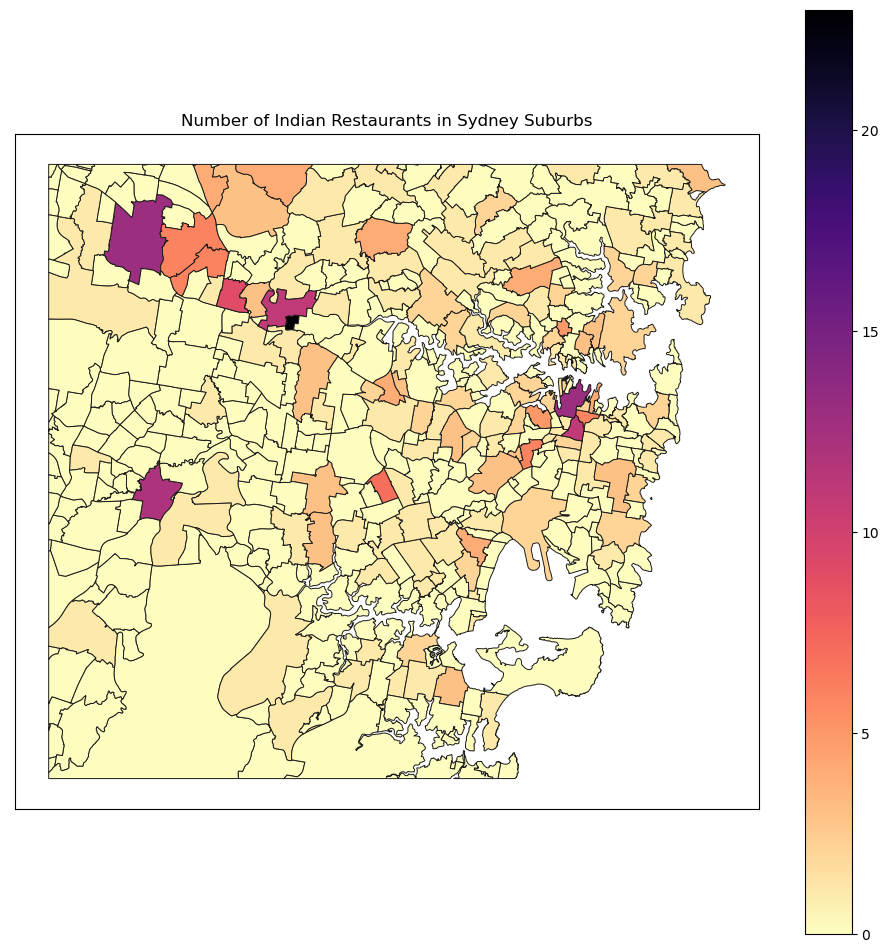

In [76]:
# Select a cuisine to plot
show_cuisine_densitymap(cuisine='Indian')

## <span style="color:darkblue">Part B - Predictive Modelling</span>

### <span style="color:darkblue">Part B, I. Feature Engineering</span>  
Feature engineering is an important step that must be done before modelling. It involves dealing with missing variables, and the selection, transformation and preparation of the dataset to improve the performance of the machine learning algorithms.

#### <span style="color:darkblue">Feature Engineering 1. Data Cleaning and Handling Missing Values</span> 

As we will be modifying the dataset significantly for the modelling, and for now I want to keep all information in the current dataframe. I will make a second data frame that can be modified.

In [77]:
df2 = df.copy()

In [78]:
# Display the header again for reference
df2.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  \
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4   
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b   

                              cuisines  number_of_cuisines  price_category  \
0   [Hot Pot, Korean BBQ, BBQ, Korean]                   4          Normal   
1  [Cafe, Coffee and Tea, Salad, Poké]                   4       Expensive   
2                           [Japanese]                   1  Very Expensive   
3                  [Modern Australian]                   1  Very Expensive   
4                        [Thai, Salad]                   2       Expensive   

       rest_type_list  number_of_types  
0     [Casual Dining]                1  
1              [Café]                1  
2       [Fine Dining]                1  
3  [Fine Dining, Bar]                2  
4     [Casual Dining]                1

#### <span style="color:darkblue">Removal of Irrelevant Columns</span> 

Before proceeding with encoding and dealing with missing values, it will be prudent to examine all the features and determine using domain knowledge and experience if they should be used in the modelling process. All the features are analyzed below along with the recommendation to keep or remove them: 

**address: remove** The address of an establishment is very important for any business including restaurants. However having 10,500 unique addresses in the modelling is impractical. A better and more finite approximation would be to use the **subzone** or suburb feature, but this still may be too complex.  

**cost: keep** The average cost of a meal for two people will have a big impact on the target variable of rating.  

**cuisine: keep but feature engineer** As identified earlier, there are 134 unique styles of cuisine in Sydney's restaurants. Many restaurants offer multiple styles of up to 6 different cuisines. This results in 1759 combinations of cuisines. As no cuisine is ordinal compared to any other, ideally one-hot encoding should be performed for the 134 unique cuisines. This will result in a dataset with 133 additional features, which will be much more complex. Target Encoding can be applied to this feature. Each suburb's name will be replaced by the average **rating** for this suburb. This must be done on the training set only so there is no data leakage into the test set.  

**lat: remove** It is conceivable that location will have an impact on a restaurant's performance. However, there is likely not a strong relationship between latitude and longitude. A better estimate of location would be the suburb or **subzone** of the restaurant.  

**link: remove** The zomato web link to the restaurant should not have any impact on the rating of the restaurant.  

**lng: remove** Similar to latitude, for the longitude, it is conceivable that location will have an impact on a restaurant's performance. However, there is likely not a strong relationship between latitude and longitude to the rating. A better estimate of location would be the suburb or **subzone** of the restaurant.  

**phone: remove** The restaurant's phone number should have no impact on the rating. This can be removed.  

**rating_number: keep** This is the target variable for the regression modelling, so of course it is crucial to keep this in the modelling. For the classification when **rating_text** is the target variable, **rating_number** will be a crucial variable as the two features are very highly correlated.  

**rating_text: keep** This is similar to **rating_number**. It will be used to create the target variable for the classification modelling and it will be a highly correlated variable to **rating_number** for the linear regression. It will need to be encoded into numbers before the modelling.   

**subzone: keep but feature engineer** This is a discrete categorical variable with very high cardinality (572 unique labels). This is far too high to perform one-hot encoding, but it may well play an important role in the restaurant's rating. Target Encoding can be applied to this feature. Each suburb's name will be replaced by the average **rating** for this suburb. This must be done on the training set only so there is no data leakage into the test set.  

**title: remove from modelling, but keep for easy identification of the restaurant** Most names should be unique, unless they are chains. The name would very likely have no influence in the rating of the food. It will be used as the row's index for easy identification.  

**type: keep** The restaurant type could well have an important role in the estimating the rating. As mentioned earlier, there are 14 unique restaurant types. These different types may well be important in determining the rating of the restaurant. As this is not an ordinal variable, one-hot encoding can be used to do this as it gives no rank to the different values.  

**votes: keep** This variable will likely have a strong impact on the final rating. It will be kept and investigated further.  

**groupon: keep** There are no missing values for groupon and there are only 122 restaurants out of 10,500 that offer Groupon deals. This will likely not have a significant impact on the rating, but it will be used.  

**color: remove** It was demonstrated in the EDA section that this is simply a colour code for the rating number. This is duplicate information and is not necessary. It would also introduce multicollinearity.  

**cost2: remove** It was demonstrated in the EDA section that this is simply the cost on a different scale. This is duplicate information and is not necessary. It would also introduce multicollinearity.  

**cuisine_color: remove** I could not determine what this feature with five unique values represents. I inspected it in in Excel; it has no clear correlation with rating_number or rating_text. As I cannot explain the meaning of this variable and it has not been provided, it will be removed.

**number_of_types: keep** This is a column I have engineered from the types of restaurants. It may have a slight impact on the rating. I will consider this to be an ordinal variable.

**number_of_cuisines: keep** This is a column I have engineered from the types of cuisine. It may have a slight impact on the rating. I will consider this to be an ordinal variable.


In [79]:
# Reading the feature analysis recommendations above, the following features will be removed from the modelling dataset.
drop_list = ['address', 'lat', 'link', 'lng', 'phone', 'color', 'cost_2', 'cuisine_color']

In [80]:
# Remove these features from the dataset and set 'title' as the row index.
df2 = df2.drop(columns=drop_list)
df2.set_index('title', inplace=True)

In [81]:
# View the header of the refined dataset
df2.head()

cost  \
title                                   
Sydney Madang                    50.0   
The Grounds of Alexandria Cafe   80.0   
Sokyo                           120.0   
Bennelong Restaurant            270.0   
Chat Thai                        55.0   

                                                                    cuisine  \
title                                                                         
Sydney Madang                    ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']   
The Grounds of Alexandria Cafe  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']   
Sokyo                                                          ['Japanese']   
Bennelong Restaurant                                  ['Modern Australian']   
Chat Thai                                                 ['Thai', 'Salad']   

                                rating_number rating_text  \
title                                                       
Sydney Madang                             4.0   Very Good   
The Grounds of Alexandria Cafe            4.6   Excellent   
Sokyo                                     4.9   Excellent   
Bennelong Restaurant                      4.9   Excellent   
Chat Thai                                 4.5   Excellent   

                                                              subzone  \
title                                                                   
Sydney Madang                                                     CBD   
The Grounds of Alexandria Cafe  The Grounds of Alexandria, Alexandria   
Sokyo                                               The Star, Pyrmont   
Bennelong Restaurant                                    Circular Quay   
Chat Thai                                                   Chinatown   

                                                  type   votes  groupon  \
title                                                                     
Sydney Madang                        ['Casual Dining']  1311.0    False   
The Grounds of Alexandria Cafe                ['Café']  3236.0    False   
Sokyo                                  ['Fine Dining']  1227.0    False   
Bennelong Restaurant            ['Fine Dining', 'Bar']   278.0    False   
Chat Thai                            ['Casual Dining']  2150.0    False   

                                                           cuisines  \
title                                                                 
Sydney Madang                    [Hot Pot, Korean BBQ, BBQ, Korean]   
The Grounds of Alexandria Cafe  [Cafe, Coffee and Tea, Salad, Poké]   
Sokyo                                                    [Japanese]   
Bennelong Restaurant                            [Modern Australian]   
Chat Thai                                             [Thai, Salad]   

                                number_of_cuisines  price_category  \
title                                                                
Sydney Madang                                    4          Normal   
The Grounds of Alexandria Cafe                   4       Expensive   
Sokyo                                            1  Very Expensive   
Bennelong Restaurant                             1  Very Expensive   
Chat Thai                                        2       Expensive   

                                    rest_type_list  number_of_types  
title                                                                
Sydney Madang                      [Casual Dining]                1  
The Grounds of Alexandria Cafe              [Café]                1  
Sokyo                                [Fine Dining]                1  
Bennelong Restaurant            [Fine Dining, Bar]                2  
Chat Thai                          [Casual Dining]                1

#### <span style="color:darkblue">Missing Values Part 1. Row Removal</span> 

It was noted above that the target variables will be **rating_number** and **rating_text**. It was oberved earlier that both of these features have 3316 missing values each. There are three main options when dealing with missing values. Row removal, column removal or imputation. As these two variables will be the target variable, column removal is not an option. Imputing the target variable with a median value would introduce bias, especially with such a large amount of missing values (3316 missing in 10,500 samples). The best option is to remove the rows where these values are missing.

In [82]:
df2 = df2.dropna(subset=['rating_number'])

In [83]:
df2.isna().sum()

cost                  103
cuisine                 0
rating_number           0
rating_text             0
subzone                 0
type                   21
votes                   0
groupon                 0
cuisines                0
number_of_cuisines      0
price_category        103
rest_type_list          0
number_of_types         0
dtype: int64

After removing these rows, there are only three features that have missing values with smaller numbers. These will be imputed after the data has been split into training and test sets. Imputation should be done after so that there is no 'data leakage' or information from the test set introduced into the training set which will influence or bias the results.

In [84]:
df2.shape

(7184, 13)

#### <span style="color:darkblue">Convert Groupon to Integer</span>  

This will be converted to an integer so it can be used in modelling. 1 is True and 0 is False.

In [85]:
df2['groupon'] = df2['groupon'].astype(int)

#### <span style="color:darkblue">Create the Rating Class Variable</span>  
As specified in the instructions, for the classification a new variable called **rating_class** is to be created as follows:  

**Class 1** or 'Low Rating' contains ratings of Poor and Average.  
**Class 2** or 'High Rating' contains ratings of Good, Very Good and Excellent.

This column will be used in the classification modelling only. It will be dropped for the regression modelling.

In [86]:
# Define a function to create the 'rating_class' column according to the value in 'rating_text'
def rating_class(row):
    if row['rating_text'] in ['Poor', 'Average']:
        return 1
    elif row['rating_text'] in ['Good', 'Very Good', 'Excellent']:
        return 2
    else:
        return None

In [87]:
# Applying the function to create the new column
df2['rating_class'] = df2.apply(rating_class, axis=1)

#### <span style="color:darkblue">Change the Rating_Text Variable to Numeric</span>  
The rating_text variable is clearly related to the rating_numeric. It has been observed that for every text rating, there is a consistent range for rating_number. The text ratings will be replaced by the median value of rating_number for each category of rating_text.

In [88]:
df2['rating_text'].value_counts()

Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: rating_text, dtype: int64

In [89]:
# Calculate the median value of rating_number for each rating_text category
df2['rating_text'] = df2.groupby('rating_text')['rating_number'].transform('median')

In [90]:
df2['rating_text'].unique()

array([4.1, 4.6, 3.6, 3.1, 2.3])

In [91]:
df2['rating_text'].value_counts()

3.1    4501
3.6    1917
4.1     506
2.3     209
4.6      51
Name: rating_text, dtype: int64

This variable is still called rating_text, even though it is now numeric. It can be seen that the text rating before conversion (shown above) is not the median rating value. The quantities for each category match, so the conversion is correct.

#### <span style="color:darkblue">Change the Price_Category Variable to Numeric</span>  
The price_category could well be correlated to the rating score. For the machine learning process, it will be converted to an ordinal numeric value. Previously, the price categories were definied as follows:

cost_bins = [0, 35, 55, 90, 501]  
cost_labels = ['Cheap', 'Normal', 'Expensive', 'Very Expensive']  

They will now be defined numerical from 1 to 4, where 1 is cheap and 4 is very expensive. 

It must be noted that the thresholds between the categories for meal costs for two people are subjective and other people will have different opinions on this matter. The numbers for Cheap and Very Expensive were also adjusted slightly so that these categories would have a reasonable number of restaurants. The four categories are not evenly balanced. 

In [92]:
# Define the numeric values
cost_labels_numeric = [1, 2, 3, 4]

# Create a label conversion dictionary
relabelling_dict = dict(zip(cost_labels, cost_labels_numeric))

# Relabel price_category. Note these are floats for now but will be converted to integers later when the NAs have been filled.
df2['price_category'] = df2['price_category'].replace(relabelling_dict)

In [93]:
# Show and inspect the 21 rows where 'type' is missing.
df2[df2['type'].isna()]

cost  \
title                            
Hong Ha                   15.0   
Out of the Blue           20.0   
Gozleme King              35.0   
Le Caravelle               NaN   
Nudefish Poké             40.0   
Yum Burger                25.0   
Lao Dong Beef Noodle      30.0   
Lizzie Bay Gourmet        40.0   
Souvlaki Bar              45.0   
Paleteria                 17.0   
Yue Fung                  40.0   
Katzy's Food Factory      65.0   
Erciyes 2                 30.0   
Great North Seafood       30.0   
Mr Pings                  25.0   
Roberta's Pizzeria        40.0   
Sam's Lunch Shop          20.0   
Tommy's Kebabs            40.0   
Subway Snacks             30.0   
Kings Charcoal Chicken    25.0   
Hungry Hunter Sandwiches  25.0   

                                                                    cuisine  \
title                                                                         
Hong Ha                                            ['Vietnamese', 'Bakery']   
Out of the Blue                     ['Burger', 'Seafood', 'Fish and Chips']   
Gozleme King                                                    ['Turkish']   
Le Caravelle                                 ['Desserts', 'Steak', 'Tapas']   
Nudefish Poké                              ['Poké', 'Hawaiian', 'Japanese']   
Yum Burger                                            ['Burger', 'Italian']   
Lao Dong Beef Noodle                                          ['Taiwanese']   
Lizzie Bay Gourmet        ['Sandwich', 'Modern Australian', 'Coffee and ...   
Souvlaki Bar                                                      ['Greek']   
Paleteria                                                      ['Desserts']   
Yue Fung                                                        ['Chinese']   
Katzy's Food Factory                                     ['Cafe', 'Bakery']   
Erciyes 2                                              ['Pizza', 'Turkish']   
Great North Seafood                                             ['Seafood']   
Mr Pings                                                        ['Chinese']   
Roberta's Pizzeria                                                ['Pizza']   
Sam's Lunch Shop                   ['Burger', 'Sandwich', 'Fish and Chips']   
Tommy's Kebabs                                                    ['Kebab']   
Subway Snacks                                                  ['Sandwich']   
Kings Charcoal Chicken                                 ['Charcoal Chicken']   
Hungry Hunter Sandwiches                                       ['Sandwich']   

                          rating_number  rating_text  \
title                                                  
Hong Ha                             4.3          4.1   
Out of the Blue                     4.6          4.6   
Gozleme King                        3.4          3.1   
Le Caravelle                        3.0          3.1   
Nudefish Poké                       3.1          3.1   
Yum Burger                          3.6          3.6   
Lao Dong Beef Noodle                3.0          3.1   
Lizzie Bay Gourmet                  3.3          3.1   
Souvlaki Bar                        3.5          3.6   
Paleteria                           2.8          3.1   
Yue Fung                            3.6          3.6   
Katzy's Food Factory                3.5          3.6   
Erciyes 2                           3.2          3.1   
Great North Seafood                 3.1          3.1   
Mr Pings                            3.0          3.1   
Roberta's Pizzeria                  3.4          3.1   
Sam's Lunch Shop                    2.9          3.1   
Tommy's Kebabs                      2.8          3.1   
Subway Snacks                       2.7          3.1   
Kings Charcoal Chicken              2.8          3.1   
Hungry Hunter Sandwiches            2.9          3.1   

                                                subzone type  votes  groupon  \
title                                                   

In [94]:
# Show the rows where 'cost' is NaN
df2[df2['cost'].isna()]

cost                  cuisine  \
title                                                                
Sasaki                                NaN             ['Japanese']   
Spicy Joint                           NaN   ['Chinese', 'Sichuan']   
Sashimi Shinsengumi                   NaN    ['Sushi', 'Japanese']   
Hanabi                                NaN           ['Korean BBQ']   
Juan Bowl & Tea                       NaN      ['Japanese', 'Tea']   
...                                   ...                      ...   
The Golden Wheel Chinese Restaurant   NaN              ['Chinese']   
Fiji Curry Hut                        NaN  ['Indian', 'Pakistani']   
Atrio Cafe                            NaN    ['Modern Australian']   
Forestville Chinese Restaurant        NaN              ['Chinese']   
Lai Sun Chinese Restaurant            NaN              ['Chinese']   

                                     rating_number  rating_text  \
title                                                             
Sasaki                                         3.9          3.6   
Spicy Joint                                    3.8          3.6   
Sashimi Shinsengumi                            3.5          3.6   
Hanabi                                         3.6          3.6   
Juan Bowl & Tea                                3.4          3.1   
...                                            ...          ...   
The Golden Wheel Chinese Restaurant            3.0          3.1   
Fiji Curry Hut                                 2.8          3.1   
Atrio Cafe                                     2.7          3.1   
Forestville Chinese Restaurant                 2.7          3.1   
Lai Sun Chinese Restaurant                     3.1          3.1   

                                            subzone               type  votes  \
title                                                                           
Sasaki                                          CBD  ['Casual Dining']   44.0   
Spicy Joint                               Chinatown  ['Casual Dining']   40.0   
Sashimi Shinsengumi                      Crows Nest  ['Casual Dining']   18.0   
Hanabi                                     Lidcombe  ['Casual Dining']   56.0   
Juan Bowl & Tea                             Redfern  ['Casual Dining']   29.0   
...                                             ...                ...    ...   
The Golden Wheel Chinese Restaurant        Eastwood  ['Casual Dining']   14.0   
Fiji Curry Hut                            Liverpool  ['Casual Dining']    6.0   
Atrio Cafe                                Liverpool           ['Café']    6.0   
Forestville Chinese Restaurant       Frenchs Forest  ['Casual Dining']    8.0   
Lai Sun Chinese Restaurant                Punchbowl  ['Casual Dining']   13.0   

                                     groupon             cuisines  \
title                                                               
Sasaki                                     0           [Japanese]   
Spicy Joint                                0   [Chinese, Sichuan]   
Sashimi Shinsengumi                        0    [Sushi, Japanese]   
Hanabi                                     0         [Korean BBQ]   
Juan Bowl & Tea                            0      [Japanese, Tea]   
...                                      ...                  ...   
The Golden Wheel Chinese Restaurant        0            [Chinese]   
Fiji Curry Hut                             0  [Indian, Pakistani]   
Atrio Cafe                                 0  [Modern Australian]   
Forestville Chinese Restaurant             0            [Chinese]   
Lai Sun Chinese Restaurant                 0            [Chinese]   

                                     number_of_cuisines  price_category  \
title                                                                     
Sasaki                                                1             NaN   
Spicy Joint                                           2             NaN   
Sa

In [95]:
# SHow the unique restaurant types
restaurant_types

['Casual Dining',
 'Café',
 'Fine Dining',
 'Bar',
 'Dessert Parlour',
 'Wine Bar',
 'Fast Food',
 'Bakery',
 'Food Court',
 'Pub',
 'Food Truck',
 'Club',
 'Beverage Shop',
 'Food Stall']

#### <span style="color:darkblue">Apply Natural Logarithms to Certain Features</span> 

In the EDA section, it was observed that the natural log of the cost and the number of votes had a more normal distribution than the original variables. New features will be made of the natural log of these features and they will be examined to see how they correlate with the target variable.

In [96]:
df['log_cost'] = np.log(df['cost'])
df['log_votes'] = np.log(df['votes'])

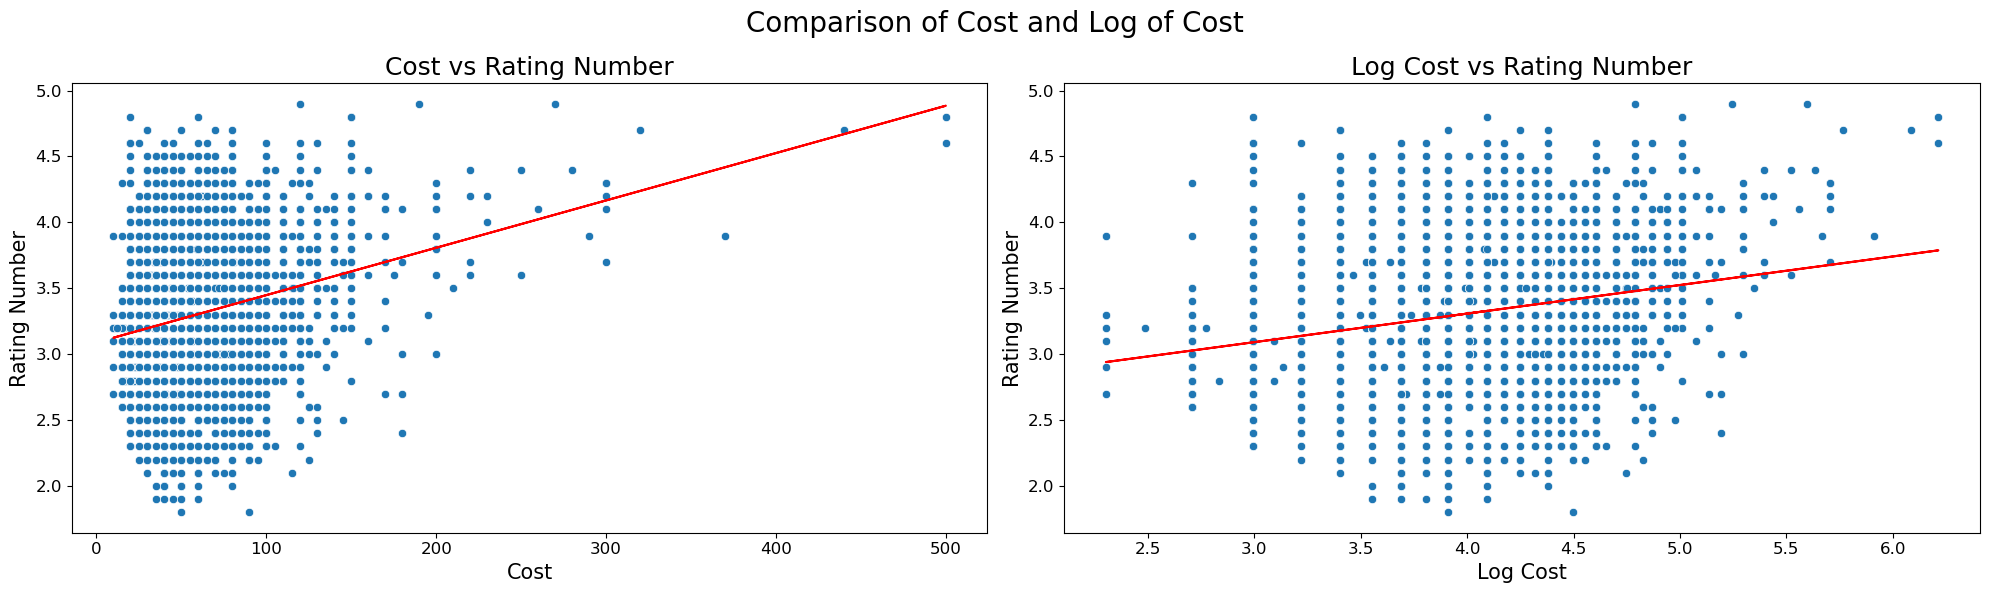

In [97]:
# Setup the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Main Title
fig.suptitle('Comparison of Cost and Log of Cost', fontsize=20)

# Plot 1 
# Drop the rows where 'cost' or 'rating_number' have NaN values
df_plot1 = df.dropna(subset=['cost', 'rating_number'])
df_plot1 = df_plot1[~(np.isinf(df_plot1['cost']) | np.isinf(df_plot1['rating_number']))]

# Create a scatter plot for cost vs rating number
sns.scatterplot(x=df_plot1['cost'], y=df_plot1['rating_number'], ax=axes[0])

# create a line of best fit for cost vs rating number
m1, b1 = np.polyfit(df_plot1['cost'], df_plot1['rating_number'], 1)

axes[0].plot(df_plot1['cost'], m1*df_plot1['cost'] + b1, color='red')
axes[0].set_title("Cost vs Rating Number", fontsize=18)
axes[0].set_xlabel("Cost", fontsize=15)
axes[0].set_ylabel("Rating Number", fontsize=15)
axes[0].tick_params(axis='both', labelsize=12)

# Drop the rows where 'log_cost' or 'rating_number' have NaN values
df_plot2 = df.dropna(subset=['log_cost', 'rating_number'])
df_plot2 = df_plot2[~(np.isinf(df_plot2['log_cost']) | np.isinf(df_plot2['rating_number']))]

# Create a scatter plot for log_cost vs rating number
sns.scatterplot(x=df_plot2['log_cost'], y=df_plot2['rating_number'], ax=axes[1])

# Create a line of best fit for log_cost vs rating number
m2, b2 = np.polyfit(df_plot2['log_cost'], df_plot2['rating_number'], 1)

axes[1].plot(df_plot2['log_cost'], m2*df_plot2['log_cost'] + b2, color='red')
axes[1].set_title("Log Cost vs Rating Number", fontsize=18)
axes[1].set_xlabel("Log Cost", fontsize=15)
axes[1].set_ylabel("Rating Number", fontsize=15)
axes[1].tick_params(axis='both', labelsize=12)

# Display the plots
plt.tight_layout()
plt.show()


There is a slightly more linear distribution of log_cost to rating_number compared to cost.

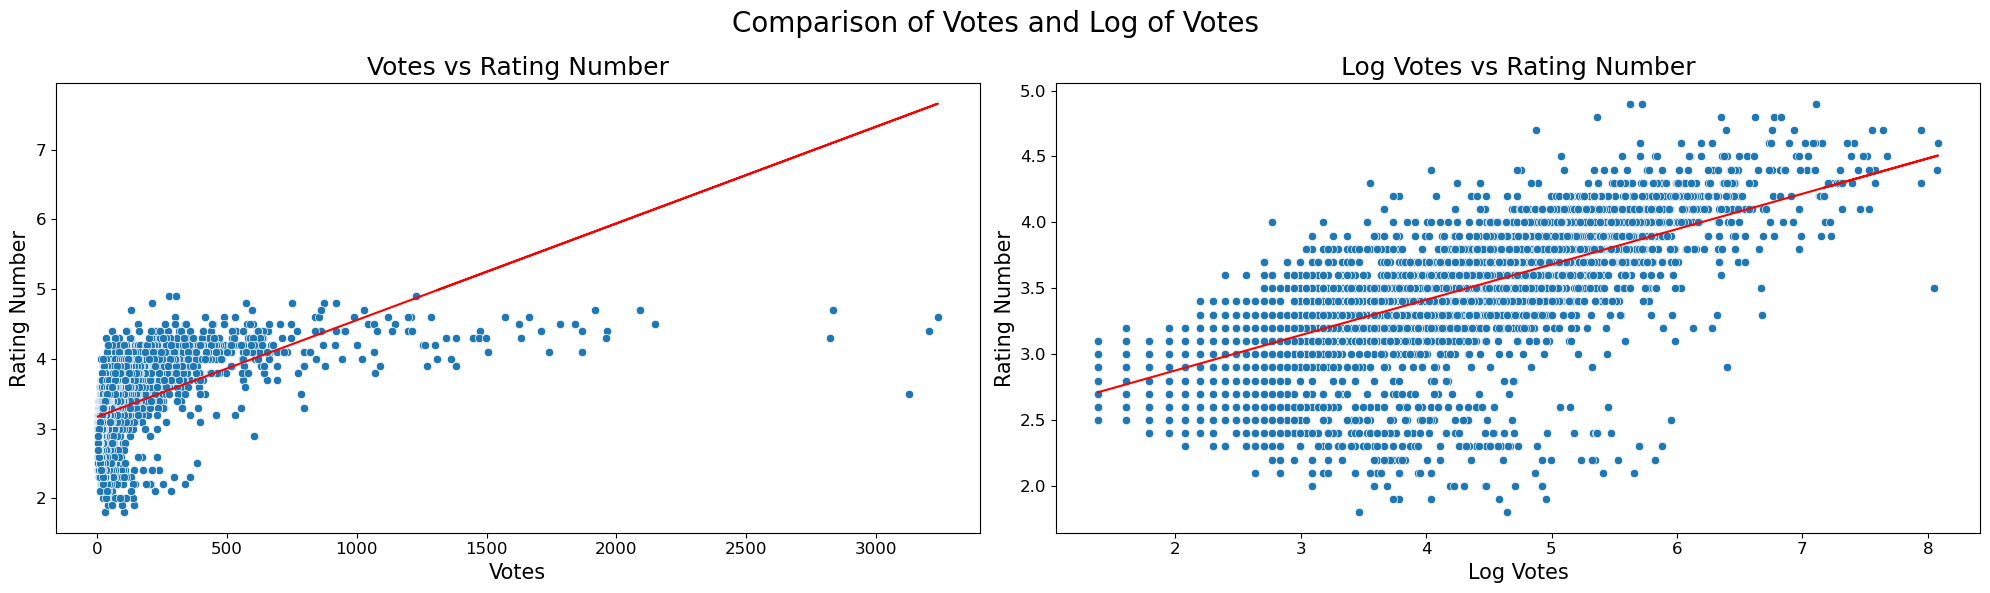

In [98]:
# Setup the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Main Title
fig.suptitle('Comparison of Votes and Log of Votes', fontsize=20)

# Plot 1 
# Drop the rows where 'votes' or 'rating_number' have NaN values
df_plot1 = df.dropna(subset=['votes', 'rating_number'])
df_plot1 = df_plot1[~(np.isinf(df_plot1['votes']) | np.isinf(df_plot1['rating_number']))]

# Create a scatter plot for votes vs rating number
sns.scatterplot(x=df_plot1['votes'], y=df_plot1['rating_number'], ax=axes[0])

# create a line of best fit for votes vs rating number
m1, b1 = np.polyfit(df_plot1['votes'], df_plot1['rating_number'], 1)

axes[0].plot(df_plot1['votes'], m1*df_plot1['votes'] + b1, color='red')
axes[0].set_title("Votes vs Rating Number", fontsize=18)
axes[0].set_xlabel("Votes", fontsize=15)
axes[0].set_ylabel("Rating Number", fontsize=15)
axes[0].tick_params(axis='both', labelsize=12)

# Drop the rows where 'log_votes' or 'rating_number' have NaN values
df_plot2 = df.dropna(subset=['log_votes', 'rating_number'])
df_plot2 = df_plot2[~(np.isinf(df_plot2['log_votes']) | np.isinf(df_plot2['rating_number']))]

# Create a scatter plot for log_votes vs rating number
sns.scatterplot(x=df_plot2['log_votes'], y=df_plot2['rating_number'], ax=axes[1])

# Create a line of best fit for log_votes vs rating number
m2, b2 = np.polyfit(df_plot2['log_votes'], df_plot2['rating_number'], 1)

axes[1].plot(df_plot2['log_votes'], m2*df_plot2['log_votes'] + b2, color='red')
axes[1].set_title("Log Votes vs Rating Number", fontsize=18)
axes[1].set_xlabel("Log Votes", fontsize=15)
axes[1].set_ylabel("Rating Number", fontsize=15)
axes[1].tick_params(axis='both', labelsize=12)

# Display the plots
plt.tight_layout()
plt.show()


There is clearly a much more linear distribution of log_votes to rating_number compared to votes.

#### <span style="color:darkblue">Split the Dataset into Training and Test Sets</span> 

Before further feature engineering and data imputation is performed, it is important to split the data into the training and test sets and first perform all the feature engineering and imputations on the training set. This will ensure that the modelling is free from any bias or influence from the test set. These modifications will then be applied to the test set, ensuring the test set had no influence.

**Note!** So that the feature engineering does not have to be performed twice, two target variables are being split in one operation for the same training set. _reg is for the regression modelling and _class is the for the classification.  

After the feature engineering and imputation, X_train and X_test will have the appropriate features removed for the regression or classification modelling.

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg, y_train_class, y_test_class = train_test_split(df2, df2['rating_number'], 
                                                             df2['rating_class'], test_size = 0.2, random_state = 0)

In [100]:
# View the header of X_train
X_train.head()

cost                           cuisine  rating_number  \
title                                                                       
High Street Bakery  30.0                          ['Cafe']            3.3   
Pepper Seeds        50.0                          ['Thai']            3.5   
Pho Ngon            40.0             ['Vietnamese', 'Pho']            3.2   
The Curry Door      70.0                        ['Indian']            3.3   
Nudefish Poké       40.0  ['Poké', 'Hawaiian', 'Japanese']            3.1   

                    rating_text                        subzone  \
title                                                            
High Street Bakery          3.1                     Willoughby   
Pepper Seeds                3.6                        Balmain   
Pho Ngon                    3.1                        Hornsby   
The Curry Door              3.1                       Cremorne   
Nudefish Poké               3.1  Greenwood Plaza, North Sydney   

                                 type  votes  groupon  \
title                                                   
High Street Bakery           ['Café']   36.0        0   
Pepper Seeds        ['Casual Dining']   54.0        0   
Pho Ngon            ['Casual Dining']   56.0        0   
The Curry Door      ['Casual Dining']   22.0        0   
Nudefish Poké                     NaN   16.0        0   

                                      cuisines  number_of_cuisines  \
title                                                                
High Street Bakery                      [Cafe]                   1   
Pepper Seeds                            [Thai]                   1   
Pho Ngon                     [Vietnamese, Pho]                   2   
The Curry Door                        [Indian]                   1   
Nudefish Poké       [Poké, Hawaiian, Japanese]                   3   

                    price_category   rest_type_list  number_of_types  \
title                                                                  
High Street Bakery             1.0           [Café]                1   
Pepper Seeds                   2.0  [Casual Dining]                1   
Pho Ngon                       2.0  [Casual Dining]                1   
The Curry Door                 3.0  [Casual Dining]                1   
Nudefish Poké                  2.0               []                0   

                    rating_class  
title                             
High Street Bakery             1  
Pepper Seeds                   2  
Pho Ngon                       1  
The Curry Door                 1  
Nudefish Poké                  1

#### <span style="color:darkblue">Create Functions for Target Encoding and One-Hot Encoding</span> 

In [101]:
# Define a function to perform target encoding of specified variables
# New columns will be created with the suffix '_encoded'. They will be numeric values
def target_encode(train, test, column, target):
    # Calculate the mean values on the training data
    encoding = train.groupby(column)[target].mean()
    
    # Apply the encoding to the training set
    train[f'{column}_encoded'] = train[column].map(encoding)
    
    # Apply the encoding to the test set
    # If a category in the test set wasn't in the training set, fill with the global mean of the target from the training set
    test[f'{column}_encoded'] = test[column].map(encoding).fillna(train[target].mean())
    
    # Return the updated train and test sets
    return train, test

In [102]:
# Define a function to perform one-hot encoding on restaurant types.
# This is a litte more complicated than a standard one hot encoding because each instance (row) may actually
# contain more than of the 14 unique values.
def one_hot_encode_types(X_train, X_test, types_all):
    # types_all is a list that was created earlier. It contains all the unique restaurant types.

    # Encoding is done separately on the tran i=and test sets
    for rest_type in types_all:
        # For X_train
        X_train[f'type_{rest_type}'] = X_train['rest_type_list'].apply(lambda x: 1 if rest_type in x else 0)

        # For X_test
        X_test[f'type_{rest_type}'] = X_test['rest_type_list'].apply(lambda x: 1 if rest_type in x else 0)
    # Return the modified train and test sets with the one-hot encoded columns for restaurant type
    return X_train, X_test


In [103]:
# Apply target encoding on 'cuisine' and 'subzone'. 
# Target encoding (or mean encoding) encodes categorical variables
# based on the mean of the target variable for each category. 
# The 3rd variable shall be target encoded. The last variable is the target variable.
X_train, X_test = target_encode(X_train, X_test, 'cuisine', 'rating_number')
X_train, X_test = target_encode(X_train, X_test, 'subzone', 'rating_number')

# The original columns will be dropped before the modelling.

In [104]:
# Perform one-hot encoding on the training and test set for restuarant types
X_train, X_test = one_hot_encode_types(X_train, X_test, types_all)

In [105]:
# View the header of X_train to see the new columns. (Scroll to the right) 
X_train.head()

cost                           cuisine  rating_number  \
title                                                                       
High Street Bakery  30.0                          ['Cafe']            3.3   
Pepper Seeds        50.0                          ['Thai']            3.5   
Pho Ngon            40.0             ['Vietnamese', 'Pho']            3.2   
The Curry Door      70.0                        ['Indian']            3.3   
Nudefish Poké       40.0  ['Poké', 'Hawaiian', 'Japanese']            3.1   

                    rating_text                        subzone  \
title                                                            
High Street Bakery          3.1                     Willoughby   
Pepper Seeds                3.6                        Balmain   
Pho Ngon                    3.1                        Hornsby   
The Curry Door              3.1                       Cremorne   
Nudefish Poké               3.1  Greenwood Plaza, North Sydney   

                                 type  votes  groupon  \
title                                                   
High Street Bakery           ['Café']   36.0        0   
Pepper Seeds        ['Casual Dining']   54.0        0   
Pho Ngon            ['Casual Dining']   56.0        0   
The Curry Door      ['Casual Dining']   22.0        0   
Nudefish Poké                     NaN   16.0        0   

                                      cuisines  number_of_cuisines  \
title                                                                
High Street Bakery                      [Cafe]                   1   
Pepper Seeds                            [Thai]                   1   
Pho Ngon                     [Vietnamese, Pho]                   2   
The Curry Door                        [Indian]                   1   
Nudefish Poké       [Poké, Hawaiian, Japanese]                   3   

                    price_category   rest_type_list  number_of_types  \
title                                                                  
High Street Bakery             1.0           [Café]                1   
Pepper Seeds                   2.0  [Casual Dining]                1   
Pho Ngon                       2.0  [Casual Dining]                1   
The Curry Door                 3.0  [Casual Dining]                1   
Nudefish Poké                  2.0               []                0   

                    rating_class  cuisine_encoded  subzone_encoded  \
title                                                                
High Street Bakery             1         3.209762         3.283333   
Pepper Seeds                   2         3.304142         3.578431   
Pho Ngon                       1         3.411765         3.283333   
The Curry Door                 1         3.172414         3.472222   
Nudefish Poké                  1         3.100000         2.900000   

                    type_Casual Dining  type_Café  type_Fine Dining  type_Bar  \
title                                                                           
High Street Bakery                   0          1                 0         0   
Pepper Seeds                         1          0                 0         0   
Pho Ngon                             1          0                 0         0   
The Curry Door                       1          0                 0         0   
Nudefish Poké                        0          0                 0         0   

                    type_Dessert Parlour  type_Wine Bar  type_Fast Food  \
title                                                                     
High Street Bakery                     0              0               0   
Pepper Seeds                           0              0               0   
Pho Ngon                               0              0               0   
The Curry Door                         0              0               0   
Nudefish Poké                          0              0               0   

                    type_Bakery  typ

It can be observed that there are now 2 new '_encoded' columns with numeric values and also 14 new 'type_' which are one hot encoded values of 1 if the restaurant is that type of restaurant or 0 otherwise. In this dataset, some restaurants are of two types.

In [106]:
# Extract all the one-hot encoded columns 
one_hot_columns = [col for col in X_train.columns if col.startswith('type_')]

# Get the sum for each column
sums_train = X_train[one_hot_columns].sum()
sums_test = X_test[one_hot_columns].sum()

# Display the sums
print("Sums for X_train:\n", sums_train)
print("\nSums for X_test:\n", sums_test)


Sums for X_train:
 type_Casual Dining      3360
type_Café               1604
type_Fine Dining          78
type_Bar                 396
type_Dessert Parlour      41
type_Wine Bar             68
type_Fast Food           234
type_Bakery               74
type_Food Court          215
type_Pub                 227
type_Food Truck            7
type_Club                  3
type_Beverage Shop         5
type_Food Stall            0
dtype: int64

Sums for X_test:
 type_Casual Dining      851
type_Café               423
type_Fine Dining         19
type_Bar                107
type_Dessert Parlour      8
type_Wine Bar            27
type_Fast Food           51
type_Bakery              17
type_Food Court          39
type_Pub                 49
type_Food Truck           1
type_Club                 2
type_Beverage Shop        3
type_Food Stall           0
dtype: int64


In [107]:
# Display  descriptive statistics of the 'cuisine_encoded' column
print(X_train['cuisine_encoded'].describe())
print()
print(X_test['cuisine_encoded'].describe())

count    5747.000000
mean        3.282808
std         0.239465
min         1.900000
25%         3.177551
50%         3.264286
75%         3.400000
max         4.900000
Name: cuisine_encoded, dtype: float64

count    1437.000000
mean        3.269463
std         0.177733
min         2.100000
25%         3.200000
50%         3.282808
75%         3.357143
max         4.100000
Name: cuisine_encoded, dtype: float64


In [108]:
# Display  descriptive statistics of the 'subzone_encoded' column
print(X_train['subzone_encoded'].describe())
print()
print(X_test['subzone_encoded'].describe())

count    5747.000000
mean        3.282808
std         0.202358
min         2.300000
25%         3.145455
50%         3.286957
75%         3.405882
max         4.400000
Name: subzone_encoded, dtype: float64

count    1437.000000
mean        3.285460
std         0.200438
min         2.500000
25%         3.145455
50%         3.286957
75%         3.405000
max         4.100000
Name: subzone_encoded, dtype: float64


The outputs above show the descriptive statistics for the target encoded columns. The values are slightly different for the train and test sets.

#### <span style="color:darkblue">Missing Values 2. Imputation</span> 

So that the training set will not have any influence on the test set, before performing imputations the dataset was split into the training and test sets. Imputations will be performed on the training set and those same values will be set on the test set. This ensures that the test set has not been given any additional information in the modelling process.

In [109]:
# Find the number of missing values for each variable
X_train.isna().sum()

cost                    83
cuisine                  0
rating_number            0
rating_text              0
subzone                  0
type                    19
votes                    0
groupon                  0
cuisines                 0
number_of_cuisines       0
price_category          83
rest_type_list           0
number_of_types          0
rating_class             0
cuisine_encoded          0
subzone_encoded          0
type_Casual Dining       0
type_Café                0
type_Fine Dining         0
type_Bar                 0
type_Dessert Parlour     0
type_Wine Bar            0
type_Fast Food           0
type_Bakery              0
type_Food Court          0
type_Pub                 0
type_Food Truck          0
type_Club                0
type_Beverage Shop       0
type_Food Stall          0
dtype: int64

In [110]:
X_test.isna().sum()

cost                    20
cuisine                  0
rating_number            0
rating_text              0
subzone                  0
type                     2
votes                    0
groupon                  0
cuisines                 0
number_of_cuisines       0
price_category          20
rest_type_list           0
number_of_types          0
rating_class             0
cuisine_encoded          0
subzone_encoded          0
type_Casual Dining       0
type_Café                0
type_Fine Dining         0
type_Bar                 0
type_Dessert Parlour     0
type_Wine Bar            0
type_Fast Food           0
type_Bakery              0
type_Food Court          0
type_Pub                 0
type_Food Truck          0
type_Club                0
type_Beverage Shop       0
type_Food Stall          0
dtype: int64

There are 21 missing values for 'type' This is a low number. They shall be imputed with the most common value of 'type' (the mode).
There are 103 missing values for 'price_category'. They shall be imputed according to the median cost when grouped by restaurant 'type'. This will be far more accurate than just the median value of the entire dataset.

In [111]:
# Find the mode (most common value) of the column 'type' in the training set.
mode_type = X_train['type'].mode()[0]  # Convert mode to a list
mode_type = mode_type.replace("[", "").replace("]", "").replace("'", "")
print(f"The mode for column 'type' is {mode_type}")

The mode for column 'type' is Casual Dining


**Impute the missing values in 'type' (type of restaurant) with the most common value in X_train**

In [112]:
# Create the one-hot encoded column name for the most common type.
mode_col = 'type_' + mode_type
# Print the number of values in this column before imputation
print(f'Column: {mode_col}')
print('Mode counts before imputation')
print(f'X_train: {X_train[mode_col].sum()}')
print(f'X_test: {X_test[mode_col].sum()}')
print()

# For every index with an NaN in column 'type' in X_train
nan_indices_train = X_train[X_train['type'].isna()].index # Find the NaN rows
X_train.loc[nan_indices_train, 'type'] = mode_type  # Replace the NaNs with mode_type
X_train.loc[nan_indices_train, mode_col] = 1  # Set corresponding one-hot encoded column to 1

# For every index with an NaN in column 'type' in X_test
nan_indices_test = X_test[X_test['type'].isna()].index # Find the NaN rows
X_test.loc[nan_indices_test, 'type'] = mode_type  # Replace the NaNs with mode_type
X_test.loc[nan_indices_test, mode_col] = 1  # Set corresponding one-hot encoded column to 1

# Print the number of values in this column after imputation
print('Mode counts after imputation')
print(f'X_train: {X_train[mode_col].sum()}')
print(f'X_test: {X_test[mode_col].sum()}')


Column: type_Casual Dining
Mode counts before imputation
X_train: 3360
X_test: 851

Mode counts after imputation
X_train: 3379
X_test: 853


It can be seen that the counts have successfully been added to the most common restaurant type after the imputation.

**Impute the missing values in 'cost' with the median cost when grouped by restaurant 'type'**  
This should be far more accurate than just the median price of cost, as the prices will be considerably different for different restaurant types. For example, a 'Fine Dining' restaurant will be far more expensive than a 'Food Court'.

In [113]:
# Group by restaurant type and determine the median cost on X_train
median_cost_per_type = X_train.groupby('type')['cost'].median()
median_cost_per_type

type
Casual Dining                            30.0
['Bakery', 'Café']                       30.0
['Bakery', 'Dessert Parlour']            22.5
['Bakery', 'Pub']                        40.0
['Bakery']                               20.0
['Bar', 'Café']                          90.0
['Bar', 'Casual Dining']                 80.0
['Bar', 'Club']                          80.0
['Bar', 'Pub']                           75.0
['Bar', 'Wine Bar']                      65.0
['Bar']                                  70.0
['Beverage Shop', 'Food Court']          15.0
['Beverage Shop']                        15.0
['Café', 'Bakery']                       40.0
['Café', 'Bar']                          52.5
['Café', 'Casual Dining']                50.0
['Café', 'Dessert Parlour']              35.0
['Café', 'Food Court']                   20.0
['Café', 'Wine Bar']                     50.0
['Café']                                 40.0
['Casual Dining', 'Bakery']              50.0
['Casual Dining', 'Bar']     

In [114]:
# Find the rows in 'cost' with missing values
nan_cost_rows = X_train[X_train['cost'].isna()]
# For each of these rows, fill in the median value for its restaurant 'type'
for idx, row in nan_cost_rows.iterrows():
    updated_cost = median_cost_per_type[row['type']]
    X_train.at[idx, 'cost'] = updated_cost
    
    # Also update the nan in 'price category' using the price catgeories that were defined previosuly.
    updated_price_category = pd.cut([updated_cost], bins=cost_bins, labels=cost_labels_numeric, right=False)[0]
    X_train.at[idx, 'price_category'] = updated_price_category
    

In [115]:
# Apply the same imputations on X_test
nan_cost_rows_test = X_test[X_test['cost'].isna()]
# For each of these rows, fill in the median value for its restaurant 'type'
for idx, row in nan_cost_rows_test.iterrows():
    # Note that median_cost_per_type was determined in X_train
    updated_cost_test = median_cost_per_type[row['type']]
    X_test.at[idx, 'cost'] = updated_cost_test

    # Also update the nan in 'price category' using the price catgeories that were defined previosuly.
    updated_price_category_test = pd.cut([updated_cost_test], bins=cost_bins, labels=cost_labels_numeric, right=False)[0]
    X_test.at[idx, 'price_category'] = updated_price_category_test

In [116]:
# Now that the NaNs have been reoved from 'price_category', convert this column to an integer.
X_train['price_category'] = X_train['price_category'].astype(int)
X_test['price_category'] = X_test['price_category'].astype(int)

In [117]:
# Find the number of missing values for each variable in both X_train and X_test
X_train.isna().sum(), X_test.isna().sum()

(cost                    0
 cuisine                 0
 rating_number           0
 rating_text             0
 subzone                 0
 type                    0
 votes                   0
 groupon                 0
 cuisines                0
 number_of_cuisines      0
 price_category          0
 rest_type_list          0
 number_of_types         0
 rating_class            0
 cuisine_encoded         0
 subzone_encoded         0
 type_Casual Dining      0
 type_Café               0
 type_Fine Dining        0
 type_Bar                0
 type_Dessert Parlour    0
 type_Wine Bar           0
 type_Fast Food          0
 type_Bakery             0
 type_Food Court         0
 type_Pub                0
 type_Food Truck         0
 type_Club               0
 type_Beverage Shop      0
 type_Food Stall         0
 dtype: int64,
 cost                    0
 cuisine                 0
 rating_number           0
 rating_text             0
 subzone                 0
 type                    0
 votes       

It is confirmed above that there are now no missing values in either the train nor the test set.

**Create Features Log of Cost and Log of Votes**  
Now that there are no more missing values, these two features can be implemented into the training and test sets.

In [118]:
X_train['log_cost'] = np.log(X_train['cost'])
X_train['log_votes'] = np.log(X_train['votes'])
X_test['log_cost'] = np.log(X_test['cost'])
X_test['log_votes'] = np.log(X_test['votes'])

In [119]:
X_train.head()

cost                           cuisine  rating_number  \
title                                                                       
High Street Bakery  30.0                          ['Cafe']            3.3   
Pepper Seeds        50.0                          ['Thai']            3.5   
Pho Ngon            40.0             ['Vietnamese', 'Pho']            3.2   
The Curry Door      70.0                        ['Indian']            3.3   
Nudefish Poké       40.0  ['Poké', 'Hawaiian', 'Japanese']            3.1   

                    rating_text                        subzone  \
title                                                            
High Street Bakery          3.1                     Willoughby   
Pepper Seeds                3.6                        Balmain   
Pho Ngon                    3.1                        Hornsby   
The Curry Door              3.1                       Cremorne   
Nudefish Poké               3.1  Greenwood Plaza, North Sydney   

                                 type  votes  groupon  \
title                                                   
High Street Bakery           ['Café']   36.0        0   
Pepper Seeds        ['Casual Dining']   54.0        0   
Pho Ngon            ['Casual Dining']   56.0        0   
The Curry Door      ['Casual Dining']   22.0        0   
Nudefish Poké           Casual Dining   16.0        0   

                                      cuisines  number_of_cuisines  \
title                                                                
High Street Bakery                      [Cafe]                   1   
Pepper Seeds                            [Thai]                   1   
Pho Ngon                     [Vietnamese, Pho]                   2   
The Curry Door                        [Indian]                   1   
Nudefish Poké       [Poké, Hawaiian, Japanese]                   3   

                    price_category   rest_type_list  number_of_types  \
title                                                                  
High Street Bakery               1           [Café]                1   
Pepper Seeds                     2  [Casual Dining]                1   
Pho Ngon                         2  [Casual Dining]                1   
The Curry Door                   3  [Casual Dining]                1   
Nudefish Poké                    2               []                0   

                    rating_class  cuisine_encoded  subzone_encoded  \
title                                                                
High Street Bakery             1         3.209762         3.283333   
Pepper Seeds                   2         3.304142         3.578431   
Pho Ngon                       1         3.411765         3.283333   
The Curry Door                 1         3.172414         3.472222   
Nudefish Poké                  1         3.100000         2.900000   

                    type_Casual Dining  type_Café  type_Fine Dining  type_Bar  \
title                                                                           
High Street Bakery                   0          1                 0         0   
Pepper Seeds                         1          0                 0         0   
Pho Ngon                             1          0                 0         0   
The Curry Door                       1          0                 0         0   
Nudefish Poké                        1          0                 0         0   

                    type_Dessert Parlour  type_Wine Bar  type_Fast Food  \
title                                                                     
High Street Bakery                     0              0               0   
Pepper Seeds                           0              0               0   
Pho Ngon                               0              0               0   
The Curry Door                         0              0               0   
Nudefish Poké                          0              0               0   

                    type_Bakery  typ

Now all the feature engineering has been done, certain columns need to be removed depending if we will be doing regression modelling or classification modelling.

#### <span style="color:darkblue">Correlation Heatmaps</span> 
Correlation heatmaps show how each variable relates with another. Of particular interest are how the input variables correlate with the target variables. These contain the name 'rating_'.

**Remove all the non-numeric columns**

In [120]:
subset=['cuisine', 'subzone', 'type', 'cuisines', 'rest_type_list']
X_train = X_train.drop(columns=subset)
X_test = X_test.drop(columns=subset)

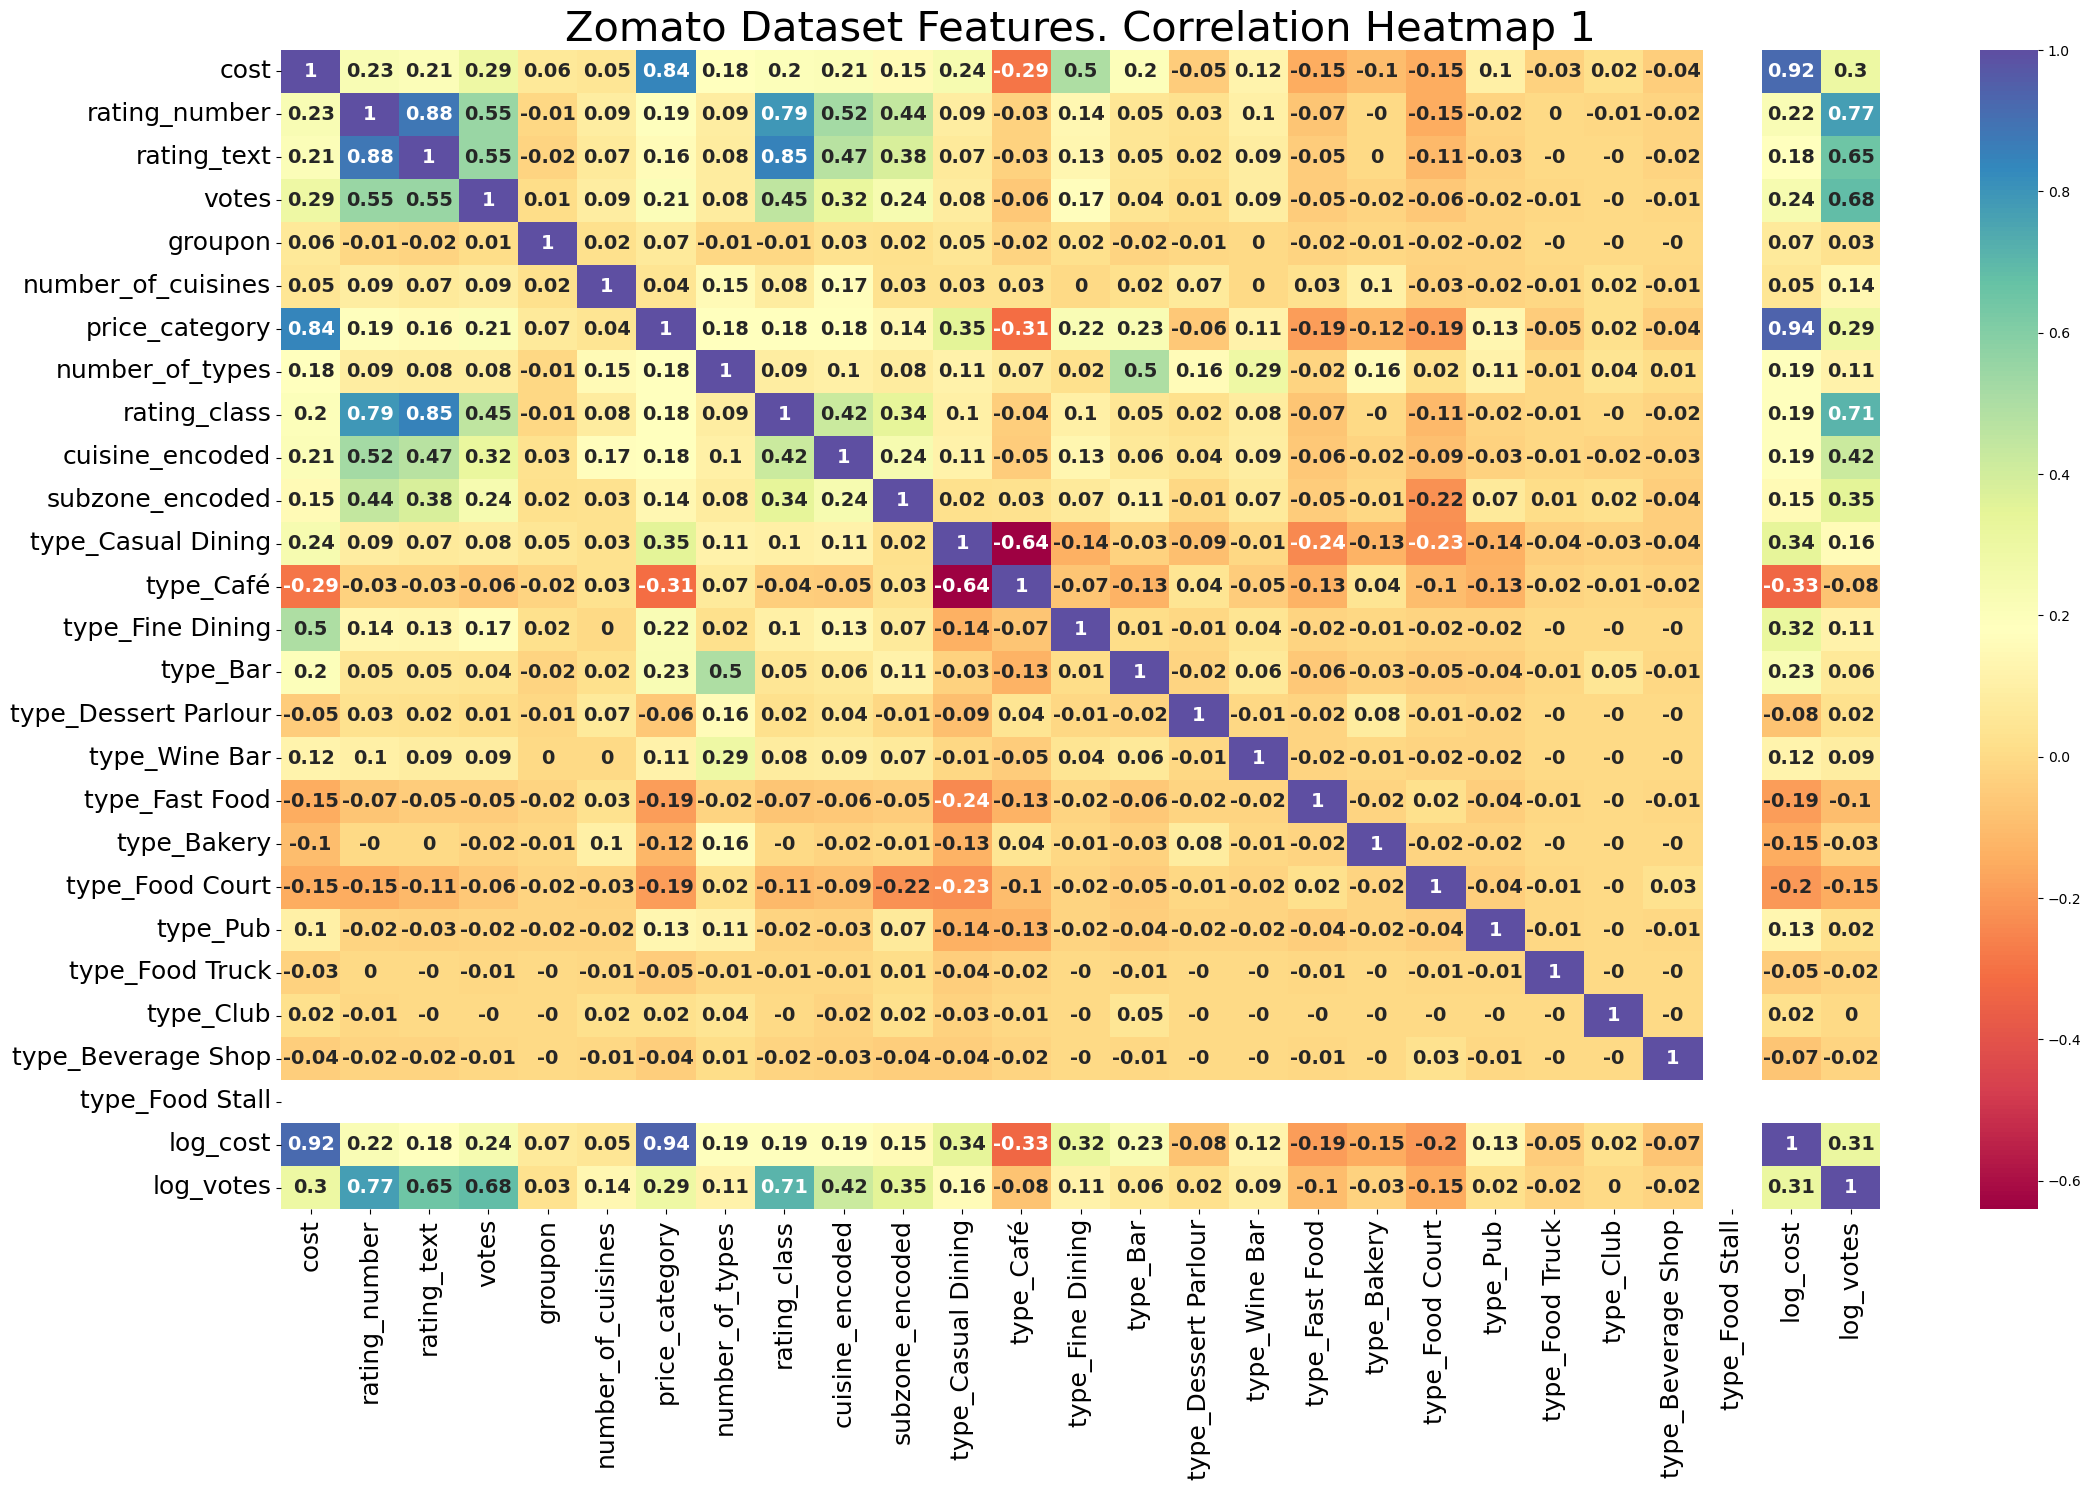

In [121]:
# Plot the 1st correlation Matrix
plt.rcParams["figure.figsize"] = [23, 15]
plt.rcParams["figure.autolayout"] = True
# Create the correlation matrix and round to 2 decimal places
cm1 = X_train.corr().round(2)

# Plot the matrix
ax = sns.heatmap(cm1, annot=True, cmap='Spectral', annot_kws={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize = 18)
plt.title('Zomato Dataset Features. Correlation Heatmap 1', fontsize=30)
plt.show()

The correlation matrix above is quite cluttered due to the one-hot encoding of the restaurant type. However, from it, it can be observed that the the type_ categories are not correlated very strongly with the target variables related to rating.

A clearer correlation matrix is shown below.

In [122]:
# Create a copy of X_train
X_train_2 = X_train.copy()

# Remove columns starting with "type_"
cols_to_remove = [col for col in X_train_2.columns if col.startswith('type_')]
X_train_2.drop(columns=cols_to_remove, inplace=True)

# Rearrange columns to have rating_number, rating_text, and rating_class last
cols_order = [col for col in X_train_2.columns if col not in ['rating_number', 'rating_text', 'rating_class']]
cols_order += ['rating_number', 'rating_text', 'rating_class']

X_train_2 = X_train_2[cols_order]


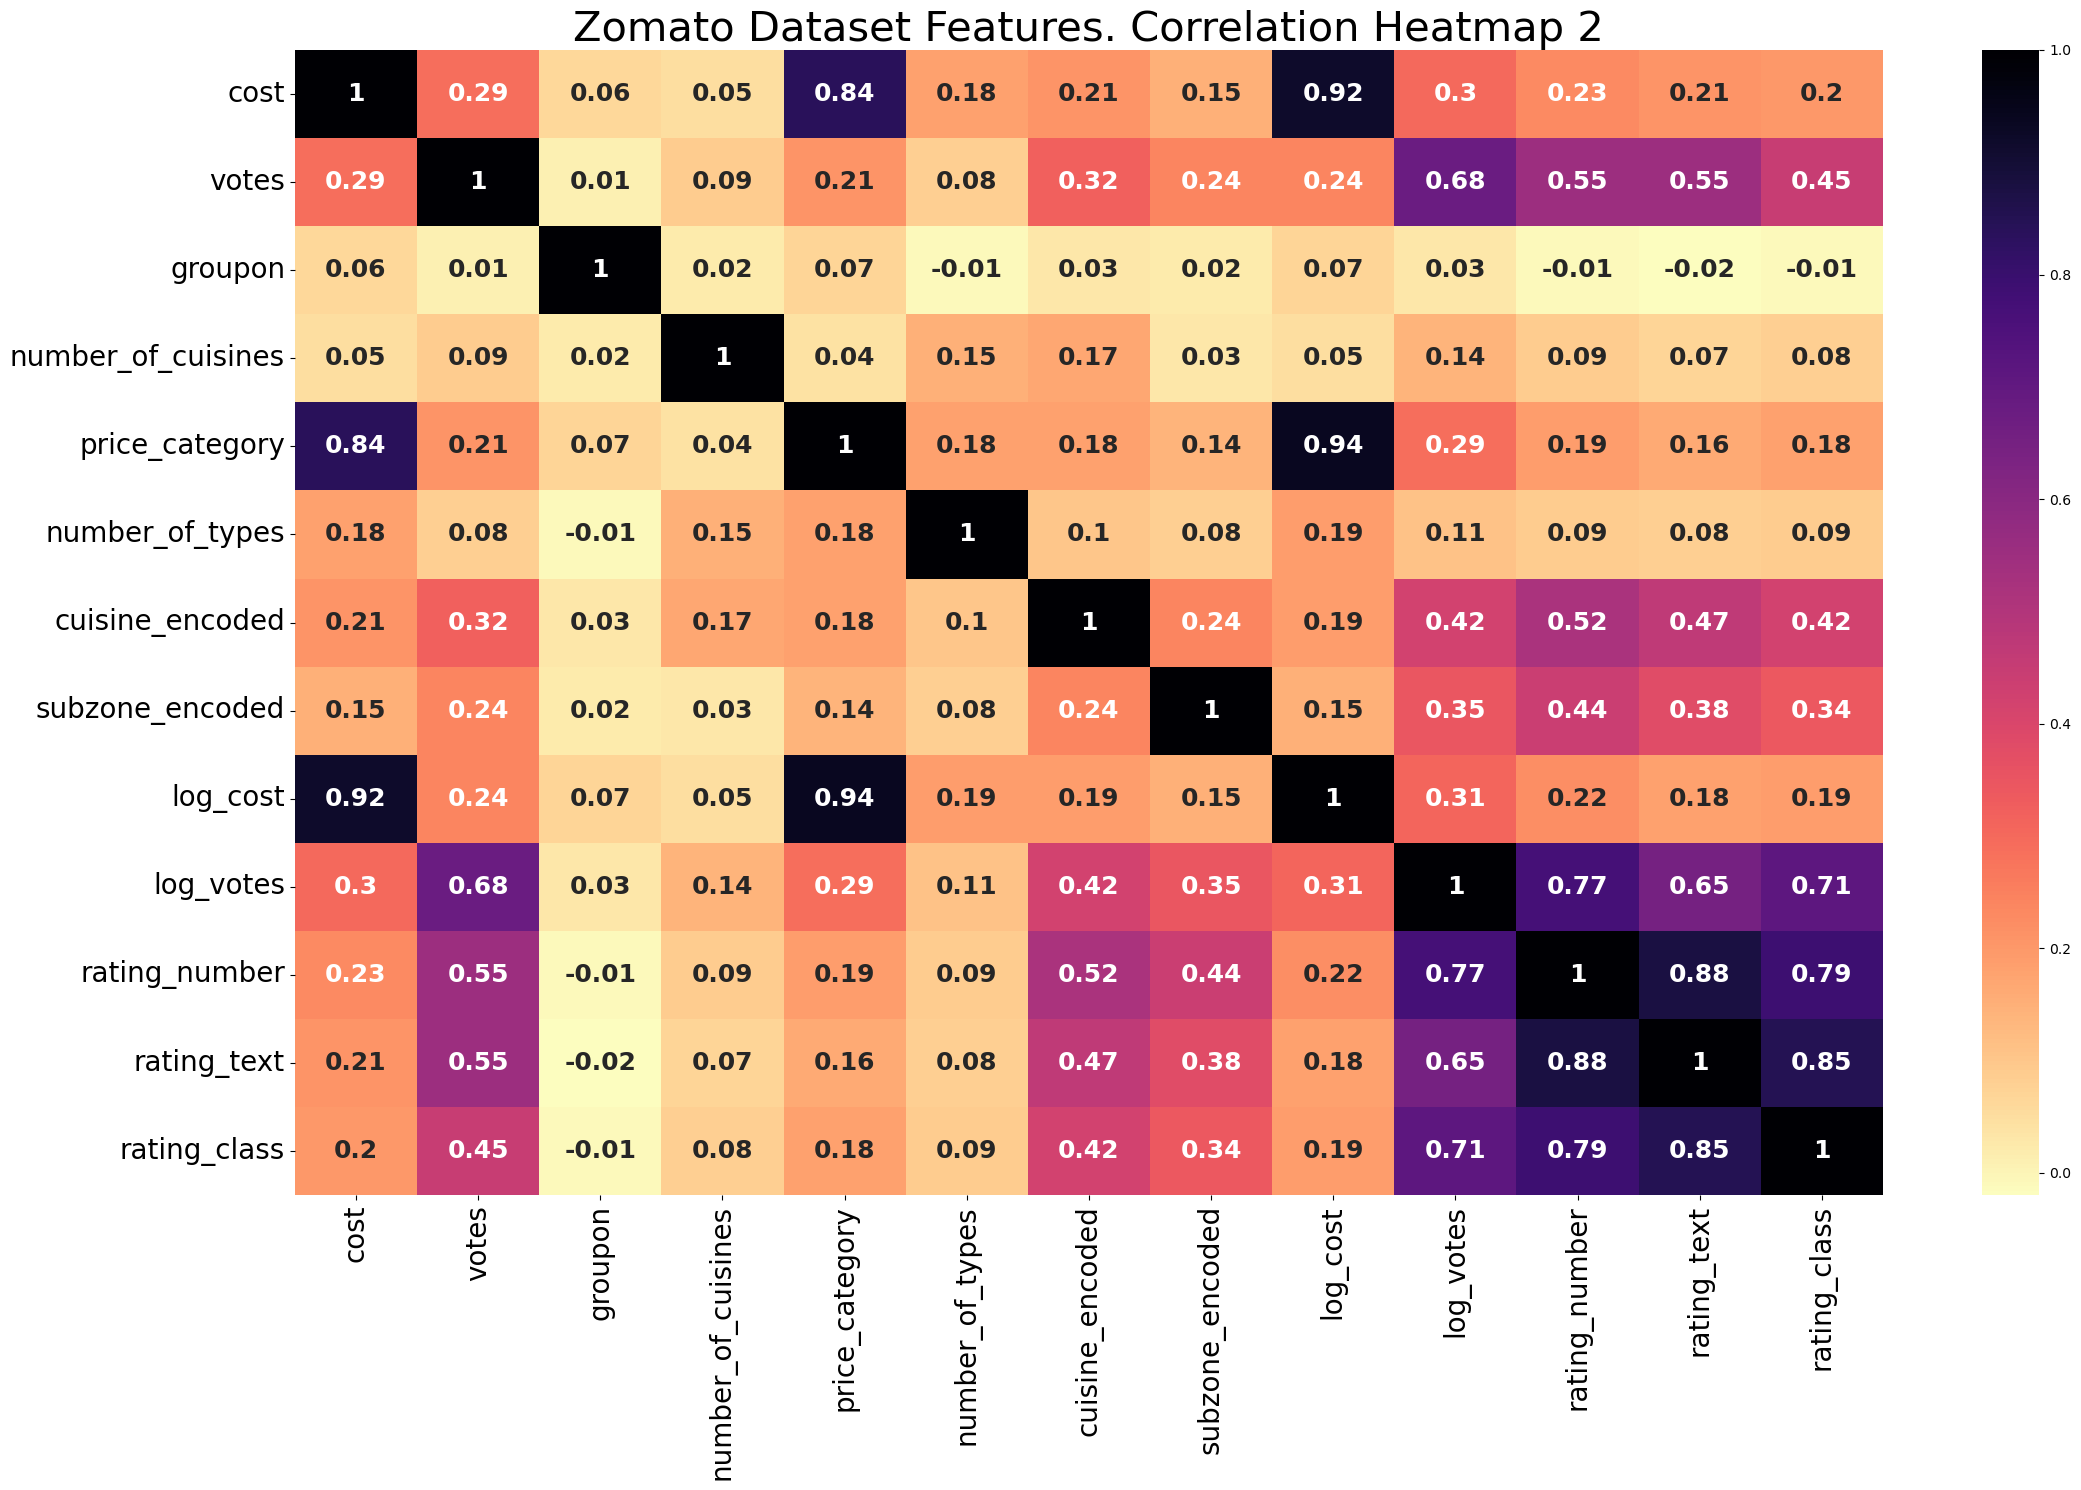

In [123]:
# Plot the 2nd correlation Matrix
plt.rcParams["figure.figsize"] = [23, 15]
plt.rcParams["figure.autolayout"] = True

# Create the correlation matrix and round to 2 decimal places
cm2 = X_train_2.corr().round(2)

# Plot the matrix
ax = sns.heatmap(cm2, annot=True, cmap='magma_r', annot_kws={'fontsize': 18, 'fontweight': 'bold'})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=20, rotation=90)  # vertical x-labels
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=20, rotation=0)  # horizontal y-labels
plt.title('Zomato Dataset Features. Correlation Heatmap 2', fontsize=30)
plt.show()


Looking above at the correlation heatmap, the target variables are the rating_number and rating_class. The three variables that are for the rating are stongle encoded with each other, which is expected.  

A colour of pale yellow indicates a weak correlation of around 0, and black indicates a strong positive correlation. There are no significant negative correlations in this dataset.  

The two categories that were mean (target) encoded '_encoded'  correlate reasonably strongly with the target variables. 

It appears the type of cuisine, the number of votes and the subzone (suburb) have a reasonable correlation with the target variables.

The log of 'cost' is slightly less correlated with the target variable than the original cost. The log_cost variable will be dropped.

An interesting observation is that log of votes is significantly more correlated with the target variables than votes. The original 'votes' will be dropped.

The other catgeories, including cost do not seem to have a significant correlation with the restaurant's overall rating.

**Pairplot of the highest correlated features**

A pair plot shows the scatter plot between several variables and can give a visual explanation of how they are correlated.

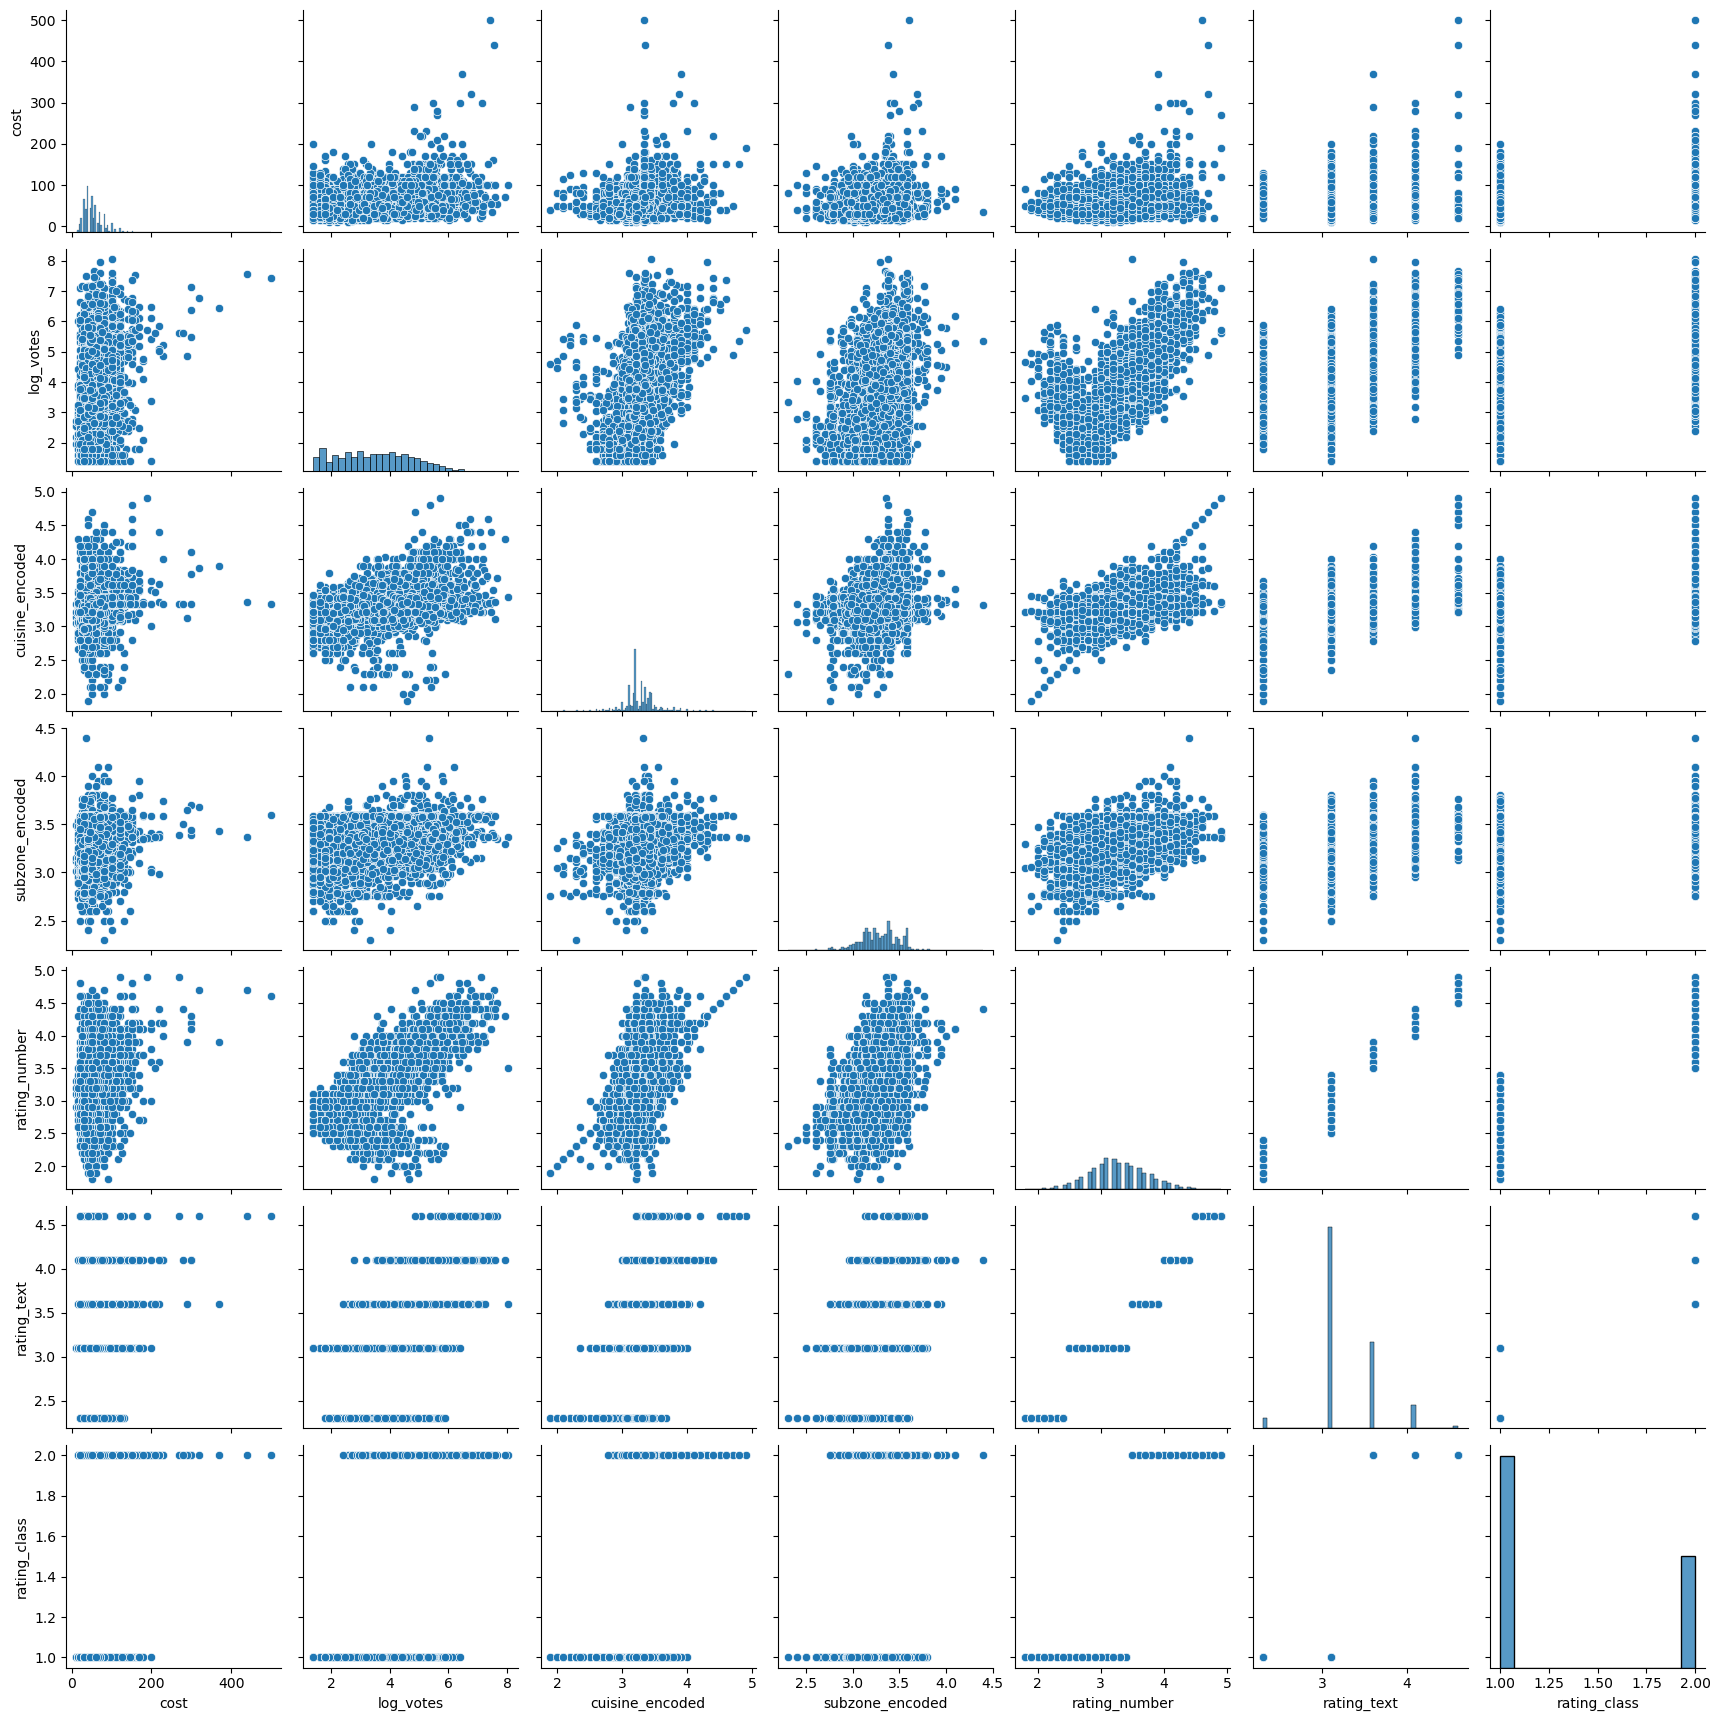

In [124]:
# Reset index of X_train_2
X_train_2_reset = X_train_2.reset_index(drop=True)

sns.pairplot(data=X_train_2_reset, palette='dark',
            vars = ['cost', 'log_votes', 'cuisine_encoded', 'subzone_encoded', 
                    'rating_number', 'rating_text', 'rating_class'])

### <span style="color:darkblue">Part B, II. Regression</span>  

#### <span style="color:darkblue">Linear Regression Model 1</span> 
A simple linear regression model will be set up to predict the target variable of rating_number.

**Remove the unrequired features for the regression modelling**

In [125]:
# View all of the features
X_train.dtypes

cost                    float64
rating_number           float64
rating_text             float64
votes                   float64
groupon                   int32
number_of_cuisines        int64
price_category            int32
number_of_types           int64
rating_class              int64
cuisine_encoded         float64
subzone_encoded         float64
type_Casual Dining        int64
type_Café                 int64
type_Fine Dining          int64
type_Bar                  int64
type_Dessert Parlour      int64
type_Wine Bar             int64
type_Fast Food            int64
type_Bakery               int64
type_Food Court           int64
type_Pub                  int64
type_Food Truck           int64
type_Club                 int64
type_Beverage Shop        int64
type_Food Stall           int64
log_cost                float64
log_votes               float64
dtype: object

In [126]:
# The following features will be removed for regression modelling:
remove_for_reg = ['rating_text', 'rating_number', 'votes', 'rating_class', 'log_cost', 'type_Food Stall']

# Make a copy of X_train and X_test. Remove the unecessary features
X_train_reg = X_train.copy()
X_test_reg = X_test.copy()

**NOTE! I considered it too much of an advantage of rating_text as an input variable when modeeling the target variable of rating_number, as they are very similar, so I removed it and also rating_class**

In [127]:
# Remove the specified columns from both the training and test sets
X_train_reg.drop(columns=remove_for_reg, inplace=True)
X_test_reg.drop(columns=remove_for_reg, inplace=True)

In [128]:
X_train_reg.head()

cost  groupon  number_of_cuisines  price_category  \
title                                                                   
High Street Bakery  30.0        0                   1               1   
Pepper Seeds        50.0        0                   1               2   
Pho Ngon            40.0        0                   2               2   
The Curry Door      70.0        0                   1               3   
Nudefish Poké       40.0        0                   3               2   

                    number_of_types  cuisine_encoded  subzone_encoded  \
title                                                                   
High Street Bakery                1         3.209762         3.283333   
Pepper Seeds                      1         3.304142         3.578431   
Pho Ngon                          1         3.411765         3.283333   
The Curry Door                    1         3.172414         3.472222   
Nudefish Poké                     0         3.100000         2.900000   

                    type_Casual Dining  type_Café  type_Fine Dining  type_Bar  \
title                                                                           
High Street Bakery                   0          1                 0         0   
Pepper Seeds                         1          0                 0         0   
Pho Ngon                             1          0                 0         0   
The Curry Door                       1          0                 0         0   
Nudefish Poké                        1          0                 0         0   

                    type_Dessert Parlour  type_Wine Bar  type_Fast Food  \
title                                                                     
High Street Bakery                     0              0               0   
Pepper Seeds                           0              0               0   
Pho Ngon                               0              0               0   
The Curry Door                         0              0               0   
Nudefish Poké                          0              0               0   

                    type_Bakery  type_Food Court  type_Pub  type_Food Truck  \
title                                                                         
High Street Bakery            0                0         0                0   
Pepper Seeds                  0                0         0                0   
Pho Ngon                      0                0         0                0   
The Curry Door                0                0         0                0   
Nudefish Poké                 0                0         0                0   

                    type_Club  type_Beverage Shop  log_votes  
title                                                         
High Street Bakery          0                   0   3.583519  
Pepper Seeds                0                   0   3.988984  
Pho Ngon                    0                   0   4.025352  
The Curry Door              0                   0   3.091042  
Nudefish Poké               0                   0   2.772589

In [129]:
X_train_reg.dtypes

cost                    float64
groupon                   int32
number_of_cuisines        int64
price_category            int32
number_of_types           int64
cuisine_encoded         float64
subzone_encoded         float64
type_Casual Dining        int64
type_Café                 int64
type_Fine Dining          int64
type_Bar                  int64
type_Dessert Parlour      int64
type_Wine Bar             int64
type_Fast Food            int64
type_Bakery               int64
type_Food Court           int64
type_Pub                  int64
type_Food Truck           int64
type_Club                 int64
type_Beverage Shop        int64
log_votes               float64
dtype: object

Only the desired numeric and binary features remain in the dataset.

In [130]:
X_train_reg.describe()

cost      groupon  number_of_cuisines  price_category  \
count  5747.000000  5747.000000         5747.000000     5747.000000   
mean     55.033235     0.014442            1.640856        2.336697   
std      28.614511     0.119316            0.842932        0.890399   
min      10.000000     0.000000            1.000000        1.000000   
25%      35.000000     0.000000            1.000000        2.000000   
50%      50.000000     0.000000            1.000000        2.000000   
75%      70.000000     0.000000            2.000000        3.000000   
max     500.000000     1.000000            8.000000        4.000000   

       number_of_types  cuisine_encoded  subzone_encoded  type_Casual Dining  \
count      5747.000000      5747.000000      5747.000000         5747.000000   
mean          1.098312         3.282808         3.282808            0.587959   
std           0.308667         0.239465         0.202358            0.492245   
min           0.000000         1.900000         2.300000            0.000000   
25%           1.000000         3.177551         3.145455            0.000000   
50%           1.000000         3.264286         3.286957            1.000000   
75%           1.000000         3.400000         3.405882            1.000000   
max           2.000000         4.900000         4.400000            1.000000   

         type_Café  type_Fine Dining     type_Bar  type_Dessert Parlour  \
count  5747.000000       5747.000000  5747.000000           5747.000000   
mean      0.279102          0.013572     0.068906              0.007134   
std       0.448597          0.115717     0.253315              0.084169   
min       0.000000          0.000000     0.000000              0.000000   
25%       0.000000          0.000000     0.000000              0.000000   
50%       0.000000          0.000000     0.000000              0.000000   
75%       1.000000          0.000000     0.000000              0.000000   
max       1.000000          1.000000     1.000000              1.000000   

       type_Wine Bar  type_Fast Food  type_Bakery  type_Food Court  \
count    5747.000000     5747.000000  5747.000000      5747.000000   
mean        0.011832        0.040717     0.012876         0.037411   
std         0.108140        0.197651     0.112751         0.189783   
min         0.000000        0.000000     0.000000         0.000000   
25%         0.000000        0.000000     0.000000         0.000000   
50%         0.000000        0.000000     0.000000         0.000000   
75%         0.000000        0.000000     0.000000         0.000000   
max         1.000000        1.000000     1.000000         1.000000   

          type_Pub  type_Food Truck    type_Club  type_Beverage Shop  \
count  5747.000000      5747.000000  5747.000000         5747.000000   
mean      0.039499         0.001218     0.000522            0.000870   
std       0.194796         0.034882     0.022844            0.029486   
min       0.000000         0.000000     0.000000            0.000000   
25%       0.000000         0.000000     0.000000            0.000000   
50%       0.000000         0.000000     0.000000            0.000000   
75%       0.000000         0.000000     0.000000            0.000000   
max       1.000000         1.000000     1.000000            1.000000   

         log_votes  
count  5747.000000  
mean      3.519119  
std       1.305315  
min       1.386294  
25%       2.484907  
50%       3.465736  
75%       4.465908  
max       8.047190

#### <span style="color:darkblue">Standardize the Dataset</span>

Standardization is a feature scaling process of subtracting the mean value from each feature and then dividing the difference by the feature's standard deviation. Distance algorithms including linear models are adversely affected by the difference in the range of features. They use distances between data points to determine their similarity. For example, looking at the content in this dataset above, the feature 'cost' has a mean value of 55.0 and a standard deviation of 28.6. Further on, the feature 'cuisine_encoded' has a mean value of 3.28 and a standard deviation of 0.239. As both features have vastly different scales, more weight in the algorithm will be given to 'cost'. This will bias the performance of the model towards 'cost' Ideally, all features should be treated with equal weight. To achieve this, all features will be scaled so that they all have a similar magnitude and variance.

In [131]:
from sklearn import preprocessing

# Fit the standard scaler to the training set only
scaler_reg = preprocessing.StandardScaler().fit(X_train_reg)

The scaler object now has the saved means and standard deviations for each feature in the training set. The result will be displayed

In [132]:
# Apply the transforms from the standard scaler to the training set
X_train_reg = scaler_reg.transform(X_train_reg)

In [133]:
# Display the mean value of each feature in the training set after scaling.
print(X_train_reg.mean(axis=0))

[-8.65460092e-18  3.49274966e-17  1.18073484e-16 -5.44003487e-17
 -2.25019624e-16 -4.30257303e-16 -2.43317923e-15 -1.03237025e-16
 -1.08182512e-17 -2.22546881e-17 -1.01382468e-16 -2.34910596e-17
 -8.59278234e-17  6.24367638e-17 -2.84365459e-17 -3.46184037e-17
  3.09092890e-18 -4.94548624e-18 -6.80004358e-18  3.09092890e-18
  5.50185344e-16]


In [134]:
# Display the standard deviation of each feature in the training set after scaling.
print(X_train_reg.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [135]:
X_train_reg.shape

(5747, 21)

In [136]:
# Apply the transforms from the standard scaler to the test set
X_test_reg = scaler_reg.transform(X_test_reg)

In [137]:
# Display the mean value of each feature in the test set after scaling.
print(X_test_reg.mean(axis=0))

[ 0.02503295 -0.01606151 -0.04038204  0.02435987  0.04222034 -0.05573573
  0.01310524  0.01145634  0.03402263 -0.00302755  0.02193174 -0.01861887
  0.0643377  -0.02644434 -0.00927864 -0.05412419 -0.02772405 -0.01496984
  0.03807862  0.04130018  0.00267791]


The mean values of the features of the test set are now close to 0 but are not perfectly centred.  This is expected. The test set is transformed using the means from the training set. This is also similar for the standard deviations below. They are close to 1 for all the features but vary slightly.

In [138]:
# Display the standard deviation of each feature in the test set after scaling.
print(X_test_reg.std(axis=0))

[1.07797314 0.93220453 0.91079597 0.99708137 1.03340394 0.74201469
 0.99025446 0.99788484 1.01604734 0.98718561 1.03642307 0.88407218
 1.25569879 0.93615812 0.95902695 0.85626857 0.93173999 0.75606073
 1.63214047 1.54811435 1.01785253]


#### <span style="color:darkblue">Build Linear Regression Model 1</span>

In [139]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr1 = LinearRegression()

# View the default parameters
lr1.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [140]:
# Train the model
lr1.fit(X_train_reg, y_train_reg)

LinearRegression()

In [141]:
# Make predictions on the test set
y_pred_lr1 = lr1.predict(X_test_reg)

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the MSE, MAE and R^2
mse_lr1 = mean_squared_error(y_test_reg, y_pred_lr1)
mae_lr1 = mean_absolute_error(y_test_reg, y_pred_lr1)
r2_lr1 = r2_score(y_test_reg, y_pred_lr1)

print(f'MSE for linear regression 1: {mse_lr1}')
print(f'MAE for linear regression 1: {mae_lr1}')
print(f'R^2 for linear regression 1: {r2_lr1}')

MSE for linear regression 1: 0.07470719724138097
MAE for linear regression 1: 0.19250666526598836
R^2 for linear regression 1: 0.6208330149268451


This is the first model and so more models will be run and the results will be compared.

MSE: Mean Square Error - Smaller values are better  
MAE: Mean Average Error - Smaller values are better  
R^2: R Squared - Larger values are better. 1.0 is the ideal score, indicating 100% of the variance is explained by the model.

**Save the Model**

In [143]:
joblib.dump(lr1, 'models/lr1.pkl')

['models/lr1.pkl']

#### <span style="color:darkblue">Build Linear Regression Model 2 Using Gradient Descent</span>  
I obtained information for this algorithm on Scikit-Learn's website:  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html



In [144]:
from sklearn.linear_model import SGDRegressor

# Initialize the model
sgdr2 = SGDRegressor()

In [145]:
# Train the model
sgdr2.fit(X_train_reg, y_train_reg)

# View the default parameters
sgdr2.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [146]:
# Make predictions on the test set
y_pred_sgdr2 = sgdr2.predict(X_test_reg)

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the MSE, MAE and R^2
mse_sgdr2 = mean_squared_error(y_test_reg, y_pred_sgdr2)
mae_sgdr2 = mean_absolute_error(y_test_reg, y_pred_sgdr2)
r2_sgdr2 = r2_score(y_test_reg, y_pred_sgdr2)

print(f'MSE for SGD Regressor 2: {mse_sgdr2}')
print(f'MAE for SGD Regressor 2: {mae_sgdr2}')
print(f'R^2 for SGD Regressor 2: {r2_sgdr2}')

MSE for SGD Regressor 2: 0.07533639591202129
MAE for SGD Regressor 2: 0.19471162217891774
R^2 for SGD Regressor 2: 0.6176395961965466


There is very little difference between models 1 and 2, however model 2 seems to be slightly worse than model 1 on this dataset. Next I will run a grid search, tuning hyperparameters to obtain better results using the Stochastic Gradient Descent model.

**Save the Model**

In [148]:
joblib.dump(sgdr2, 'models/sgdr2.pkl')

['models/sgdr2.pkl']

#### <span style="color:darkblue">Build Linear Regression Model 3 Using Stochastic Gradient Descent and Gridsearch</span>

In [149]:
# Import the required modules.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
import time

In [150]:
# Create an instance of the Stochastic Gradient Descent model.
sgdr3 = SGDRegressor()

**Run the Randomized Search on the set of hyperparameters and fit the training data**

A detailed grid search could take a large amount of time. Instead, a randomized search will be performed with a limited number of iterations.

Cross-validation will be performed to determine the best model. The training dataset will be split into 10 folds. Every 10th fold will be used once for validation and 9 times for training. The results will be aggregated together and fitted to the model. This process will be repeated three times to reduce randomess of the results.

Below the model's hyperparameters are set based on the code provided for this project and on a tutorial by Jason Brownlee.

**Set the hyperparameters for the randomized search**

In [151]:
# Define which hyperparameters will be used in the grid search.

params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'l1_ratio': [0, 0.15, 0.5, 0.85, 1],
    'max_iter': [500, 1000, 1500],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}


In [152]:
# Define the randomized search

# set up cross validation to split into 10 folds. 
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)

# Grid search takes more time, so I shortened the duration by implementing a randomized search.
"""
gs3 = GridSearchCV(estimator=sgdr3, param_grid=params, cv=cv,
        scoring='neg_mean_squared_error')
"""

gs3 = RandomizedSearchCV(estimator=sgdr3, param_distributions=params, n_iter=200, 
                         cv=cv, scoring='neg_mean_squared_error', random_state=0)


**Determine the best hyperparameter settings**

In [153]:
# get the start time
st = time.time()

# Fit the grid search options to the training data.
gs3.fit(X_train_reg, y_train_reg)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print(str(round(elapsed_time,2)) + " seconds")

89.86 seconds


**Output the optimal values**

In [154]:
print("Best Hyper Parameters:", gs3.best_params_)

Best Hyper Parameters: {'tol': 0.001, 'penalty': 'l2', 'max_iter': 1000, 'loss': 'squared_loss', 'learning_rate': 'invscaling', 'l1_ratio': 1, 'alpha': 0.001}


**Make a prediction and calculate metrics**<br>

In [155]:
# Summarize the results
print("Best: %f using %s" % (gs3.best_score_, gs3.best_params_))
means = gs3.cv_results_['mean_test_score']
stds = gs3.cv_results_['std_test_score']
params = gs3.cv_results_['params']


Best: -0.069499 using {'tol': 0.001, 'penalty': 'l2', 'max_iter': 1000, 'loss': 'squared_loss', 'learning_rate': 'invscaling', 'l1_ratio': 1, 'alpha': 0.001}


In [156]:
# Fit the best hyperparameters to the model.
sgdr3 = gs3.best_estimator_

In [157]:
# Display the model's parameters.
params = sgdr3.get_params()
params

{'alpha': 0.001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 1,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Predict the classifications on the test set**

In [158]:
y_pred_sgdr3 = sgdr3.predict(X_test_reg)

**Evaluate the model**

In [159]:
# Calculate the MSE, MAE and R^2
mse_sgdr3 = mean_squared_error(y_test_reg, y_pred_sgdr3)
mae_sgdr3 = mean_absolute_error(y_test_reg, y_pred_sgdr3)
r2_sgdr3 = r2_score(y_test_reg, y_pred_sgdr3)

print(f'MSE for SGD Regressor 3: {mse_sgdr3}')
print(f'MAE for SGD Regressor 3: {mae_sgdr3}')
print(f'R^2 for SGD Regressor 3: {r2_sgdr3}')

MSE for SGD Regressor 3: 0.07478204223878317
MAE for SGD Regressor 3: 0.19304791383804584
R^2 for SGD Regressor 3: 0.6204531485543843


**Save the Model**

In [160]:
joblib.dump(sgdr3, 'models/sgdr3.pkl')

['models/sgdr3.pkl']

#### <span style="color:darkblue">Regression Model Evaluation</span>

In [161]:
# Create a dictionary with the results
results = {
    'Model': ['Linear Regression 1', 'SGD Regressor 2', 'SGD Regressor 3'],
    'MSE': [mse_lr1, mse_sgdr2, mse_sgdr3],
    'MAE': [mae_lr1, mae_sgdr2, mae_sgdr3],
    'R^2': [r2_lr1, r2_sgdr2, r2_sgdr3]
}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Round the results to 6 decimal places
results_df = results_df.round(6)

# Display the results for the three models
results_df

Model       MSE       MAE       R^2
0  Linear Regression 1  0.074707  0.192507  0.620833
1      SGD Regressor 2  0.075336  0.194712  0.617640
2      SGD Regressor 3  0.074782  0.193048  0.620453

MSE: Mean Square Error  
MAE: Mean Average Error  
R^2: R Squared

Looking at the three metrics for the three models, the results are very similar. The initial linear regression model looks to be slightly better than the Stochastic Gradient Descent models although the margin is extremely slight. Model SGDR3 is slightly better than SGDR2 which is expected as its best hyperparameters were determined using the randomized search. It was the second best performing model on this dataset. The linear regression model had the smallest MSE and MAE values and the highest R^2 value, winning on all three metrics.

It would have to be concluded that all models are very similar but Linear Regression performs the best for this dataset.

In [162]:
# Save the dataframe as a CSV file
results_df.to_csv('Regression_Summary.csv', index=False)

### <span style="color:darkblue">Part B, III. Classification</span>  

Various models will be configured and run to classify the desired class of ratings as class 1 or class 2. Before commencing with the modelling, the dataset must be configured correctly. As is requested, earlier in the Feature Engineering section, the rating_text was used to create a new variable which is called **rating_class**. **rating_class** consists of two values:

**Class 1** contains ratings of 'Poor' and 'Average'.  
**Class 2** contains ratings of 'Good', 'Very Good' and 'Excellent'.

#### <span style="color:darkblue">Configure the Dataset for the Classification Task</span> 

**Remove the unrequired features for the classification modelling**

It is mentioned again that the complete dataset was already split into the training and classification test sets previously so that all the feature engineering and imputations did not have to be repeated. A few columns are not required to be used for the classification, so they will be removed.

In [163]:
# Import the required libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [164]:
# Observe all the columns in the dataset
X_train.dtypes, X_train.shape

(cost                    float64
 rating_number           float64
 rating_text             float64
 votes                   float64
 groupon                   int32
 number_of_cuisines        int64
 price_category            int32
 number_of_types           int64
 rating_class              int64
 cuisine_encoded         float64
 subzone_encoded         float64
 type_Casual Dining        int64
 type_Café                 int64
 type_Fine Dining          int64
 type_Bar                  int64
 type_Dessert Parlour      int64
 type_Wine Bar             int64
 type_Fast Food            int64
 type_Bakery               int64
 type_Food Court           int64
 type_Pub                  int64
 type_Food Truck           int64
 type_Club                 int64
 type_Beverage Shop        int64
 type_Food Stall           int64
 log_cost                float64
 log_votes               float64
 dtype: object,
 (5747, 27))

In [165]:
# The following features will be removed for classification modelling:
remove_for_class = ['rating_number', 'rating_text', 'rating_class', 'votes', 'log_cost', 'type_Food Stall']

**NOTE! As was done for the regression modelling, all variables containing the word rating are very highly correlated with each other. Including the other two when rating_class is the target led to 100% prediction accuracy, so I removed them for this assignment to be able to compare the models' performance better.**

In [166]:
# Make a copy of X_train and X_test
X_train_class = X_train.copy()
X_test_class = X_test.copy()

In [167]:
# Remove the unecessary features
X_train_class.drop(columns=remove_for_class, inplace=True)
X_test_class.drop(columns=remove_for_class, inplace=True)

In [168]:
X_train_class.head()

cost  groupon  number_of_cuisines  price_category  \
title                                                                   
High Street Bakery  30.0        0                   1               1   
Pepper Seeds        50.0        0                   1               2   
Pho Ngon            40.0        0                   2               2   
The Curry Door      70.0        0                   1               3   
Nudefish Poké       40.0        0                   3               2   

                    number_of_types  cuisine_encoded  subzone_encoded  \
title                                                                   
High Street Bakery                1         3.209762         3.283333   
Pepper Seeds                      1         3.304142         3.578431   
Pho Ngon                          1         3.411765         3.283333   
The Curry Door                    1         3.172414         3.472222   
Nudefish Poké                     0         3.100000         2.900000   

                    type_Casual Dining  type_Café  type_Fine Dining  type_Bar  \
title                                                                           
High Street Bakery                   0          1                 0         0   
Pepper Seeds                         1          0                 0         0   
Pho Ngon                             1          0                 0         0   
The Curry Door                       1          0                 0         0   
Nudefish Poké                        1          0                 0         0   

                    type_Dessert Parlour  type_Wine Bar  type_Fast Food  \
title                                                                     
High Street Bakery                     0              0               0   
Pepper Seeds                           0              0               0   
Pho Ngon                               0              0               0   
The Curry Door                         0              0               0   
Nudefish Poké                          0              0               0   

                    type_Bakery  type_Food Court  type_Pub  type_Food Truck  \
title                                                                         
High Street Bakery            0                0         0                0   
Pepper Seeds                  0                0         0                0   
Pho Ngon                      0                0         0                0   
The Curry Door                0                0         0                0   
Nudefish Poké                 0                0         0                0   

                    type_Club  type_Beverage Shop  log_votes  
title                                                         
High Street Bakery          0                   0   3.583519  
Pepper Seeds                0                   0   3.988984  
Pho Ngon                    0                   0   4.025352  
The Curry Door              0                   0   3.091042  
Nudefish Poké               0                   0   2.772589

In [169]:
X_train_class.dtypes

cost                    float64
groupon                   int32
number_of_cuisines        int64
price_category            int32
number_of_types           int64
cuisine_encoded         float64
subzone_encoded         float64
type_Casual Dining        int64
type_Café                 int64
type_Fine Dining          int64
type_Bar                  int64
type_Dessert Parlour      int64
type_Wine Bar             int64
type_Fast Food            int64
type_Bakery               int64
type_Food Court           int64
type_Pub                  int64
type_Food Truck           int64
type_Club                 int64
type_Beverage Shop        int64
log_votes               float64
dtype: object

In [170]:
X_train_class.shape

(5747, 21)

Only the desired numeric and binary features remain in the dataset.

#### <span style="color:darkblue">Standardize the Dataset</span>

As was explained and done in the regression modelling, standardization will be applied, to give all variables equal weight in the modelling.

In [171]:
# Fit the standard scaler to the training set only
scaler_class = preprocessing.StandardScaler().fit(X_train_class)

The scaler object now has the saved means and standard deviations for each feature in the training set. The result will be displayed

In [172]:
# Apply the transforms from the standard scaler to the training set
X_train_class = scaler_class.transform(X_train_class)

In [173]:
# Display the mean value of each feature in the training set after scaling.
print(X_train_class.mean(axis=0))

[-8.65460092e-18  3.49274966e-17  1.18073484e-16 -5.44003487e-17
 -2.25019624e-16 -4.30257303e-16 -2.43317923e-15 -1.03237025e-16
 -1.08182512e-17 -2.22546881e-17 -1.01382468e-16 -2.34910596e-17
 -8.59278234e-17  6.24367638e-17 -2.84365459e-17 -3.46184037e-17
  3.09092890e-18 -4.94548624e-18 -6.80004358e-18  3.09092890e-18
  5.50185344e-16]


In [174]:
# Display the standard deviation of each feature in the training set after scaling.
print(X_train_class.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [175]:
# Apply the transforms from the standard scaler to the test set
X_test_class = scaler_class.transform(X_test_class)

In [176]:
# Display the mean value of each feature in the test set after scaling.
print(X_test_class.mean(axis=0))

[ 0.02503295 -0.01606151 -0.04038204  0.02435987  0.04222034 -0.05573573
  0.01310524  0.01145634  0.03402263 -0.00302755  0.02193174 -0.01861887
  0.0643377  -0.02644434 -0.00927864 -0.05412419 -0.02772405 -0.01496984
  0.03807862  0.04130018  0.00267791]


The mean values of the features of the test set are now close to 0 but are not perfectly centred.  This is expected. The test set is transformed using the means from the training set. This is also similar for the standard deviations below. They are close to 1 for all the features but vary slightly.

In [177]:
# Display the standard deviation of each feature in the test set after scaling.
print(X_test_class.std(axis=0))

[1.07797314 0.93220453 0.91079597 0.99708137 1.03340394 0.74201469
 0.99025446 0.99788484 1.01604734 0.98718561 1.03642307 0.88407218
 1.25569879 0.93615812 0.95902695 0.85626857 0.93173999 0.75606073
 1.63214047 1.54811435 1.01785253]


#### <span style="color:darkblue">Classification  Model 1 - Logistic Regression</span> 
A simple logistic regression model will be configured to predict the classification target variable of rating_class.

**Create the model**

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
# Create an instance of the logistic regression model.
LogReg1 = LogisticRegression()

# View the default parameters
LogReg1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

These default parameters work well for this model, so I will not perform a grid search to tune the hyperparamters.

**Fit the model to the training data**

In [180]:
LogReg1.fit(X_train_class, y_train_class)

LogisticRegression()

**Run predictions on the test set**

In [181]:
y_pred_LogReg1 = LogReg1.predict(X_test_class)

**Display accuracy, precision and recall on the test set**

In [182]:
print("Accuracy:",round(metrics.accuracy_score(y_test_class, y_pred_LogReg1),5))
print("Precision:",round(metrics.precision_score(y_test_class, y_pred_LogReg1, average = 'weighted'),5))
print("Recall:",round(metrics.recall_score(y_test_class, y_pred_LogReg1, average = 'weighted'),5))
print("F1-score:",round(metrics.f1_score(y_test_class, y_pred_LogReg1, average = 'weighted'),5))

Accuracy: 0.85177
Precision: 0.85001
Recall: 0.85177
F1-score: 0.85013


**Display the classification report for LogReg1**

In [183]:
class_labels = ['Low Rating', 'High Rating']

print("Classification Report:")
print(classification_report(y_test_class, y_pred_LogReg1, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

  Low Rating       0.87      0.91      0.89       945
 High Rating       0.81      0.74      0.77       492

    accuracy                           0.85      1437
   macro avg       0.84      0.83      0.83      1437
weighted avg       0.85      0.85      0.85      1437



**Display the Confusion Matrix**

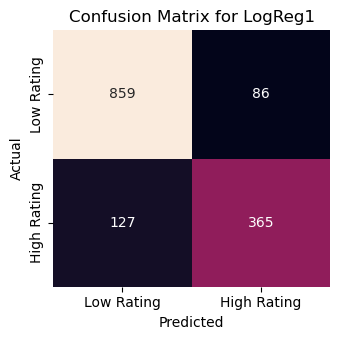

In [184]:
cm1 = confusion_matrix(y_test_class, y_pred_LogReg1)
plt.figure(figsize=(3.5,3.5))
sns.heatmap(cm1, annot=True, fmt='g', cbar=False,
xticklabels=class_labels,
yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LogReg1')
plt.show()

With the rating_number variable included in the dataset, it was predicting with 100% accuracy which seems too good. So, I removed rating_number from the training set and it is now predicting with some errors. I would say that a prediction accuracy of 85.18% is quite good considering the dataset and that the highest correlation in the correlation matrix was 71% with log votes. Further models will be tried, evaluated and compared.

**Save the Model**

In [185]:
joblib.dump(LogReg1, 'models/LogReg1.pkl')

['models/LogReg1.pkl']

#### <span style="color:darkblue">Classification  Model 2 - Support Vector Machine</span> 
A Support Vector Machine model will be configured to predict the classification target variable of rating_class.

**Create the model**

In [186]:
from sklearn.svm import SVC

In [187]:
# Create an instance of the Support Vector Machine model.
svc2 = SVC()

# View the default parameters
svc2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Perform a gridsearch and tune the hyperparameters**

**Parameters setup:**<br>
Three kernels are chosen and various hyperparameters pertaining to them will be tested to determine what is the optimum combination of settings for this dataset.

In [188]:
# A reduced parameter set will be used for now to speed up the grid search process
param_grid = [{'C': [0.0, 0.1, 0.5, 1], 
               'kernel': ['linear'], 'class_weight': ['balanced']},
  {'C': [0.0, 0.1, 0.5, 1, 5, 10], 'kernel': ['rbf'],
   'gamma': [0.01, 0.05, 0.1, 0.5, 1],
   'class_weight': ['balanced']},        
{'C': [0.1, 0.5, 1, 5, 10], 'kernel': ['poly'], 
 'gamma': ['scale', 0.01, 0.1, 0.005, 0.05, 0.5], 
 'degree': [1,2,3,4], 'coef0': [0.1, 0.5, 1, 5, 10], 
 'class_weight': ['balanced'], 'max_iter': [1000]}
 ]


In [189]:
# Define the grid search

# set up cross validation to split into 10 folds. Repeat once
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)

# Load the model and all parameters into the randomized search.
gsc2 = RandomizedSearchCV(estimator=svc2, param_distributions=param_grid, n_iter=100, 
                         cv=cv, scoring='accuracy', random_state=0)

In [190]:
# get the start time
st = time.time()

# Test and fit the grid search options to the training data.
gsc2.fit(X_train_class, y_train_class)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print(str(round(elapsed_time,2)) + " seconds")

125.21 seconds


**Display the best hyperparameter settings**

In [191]:
print("Best Hyper Parameters:", gsc2.best_params_)

Best Hyper Parameters: {'kernel': 'linear', 'class_weight': 'balanced', 'C': 0.1}


**Calculate the metrics**

In [192]:
# Summarize the results
print("Best: %f using %s" % (gsc2.best_score_, gsc2.best_params_))
means = gsc2.cv_results_['mean_test_score']
stds = gsc2.cv_results_['std_test_score']
params = gsc2.cv_results_['params']


Best: 0.870017 using {'kernel': 'linear', 'class_weight': 'balanced', 'C': 0.1}


**Predict the classifications on the test set**

In [193]:
svc2 = gsc2.best_estimator_

In [194]:
y_pred_svc2=svc2.predict(X_test_class)

**Display accuracy, precision and recall on the test set**

In [195]:
print("Accuracy:",round(metrics.accuracy_score(y_test_class, y_pred_svc2),5))
print("Precision:",round(metrics.precision_score(y_test_class, y_pred_svc2, average = 'weighted'),5))
print("Recall:",round(metrics.recall_score(y_test_class, y_pred_svc2, average = 'weighted'),5))
print("F1-score:",round(metrics.f1_score(y_test_class, y_pred_svc2, average = 'weighted'),5))

Accuracy: 0.85456
Precision: 0.86294
Recall: 0.85456
F1-score: 0.85661


**Display the classification report for LogReg1**

In [196]:
class_labels = ['Low Rating', 'High Rating']

print("Classification Report:")
print(classification_report(y_test_class, y_pred_svc2, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

  Low Rating       0.92      0.85      0.89       945
 High Rating       0.75      0.86      0.80       492

    accuracy                           0.85      1437
   macro avg       0.84      0.86      0.84      1437
weighted avg       0.86      0.85      0.86      1437



**Display the Confusion Matrix**

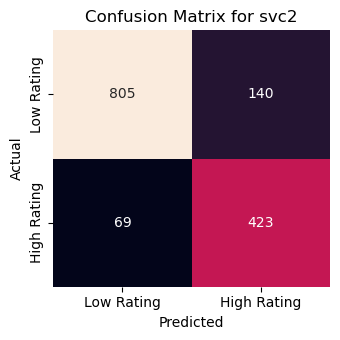

In [197]:
cm2 = confusion_matrix(y_test_class, y_pred_svc2)
plt.figure(figsize=(3.5,3.5))
sns.heatmap(cm2, annot=True, fmt='g', cbar=False,
xticklabels=class_labels,
yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for svc2')
plt.show()

The accuracy for this support vector machine classifier is very similar to the logistic regression classifier. It has an accuracy of 85.46% which is slightly better than the logistic regression which was 85.17%

**Save the Model**

In [198]:
joblib.dump(svc2, 'models/svc2.pkl')

['models/svc2.pkl']

#### <span style="color:darkblue">Classification Model 3 - Random Forest</span> 
A Random Forest model will be configured to predict the classification target variable of rating_class.

**Create the model**

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
# Create an instance of the Random Forest model.
rfc3 = RandomForestClassifier(n_estimators=200, random_state=0)

# View the default parameters
rfc3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

**Perform a randomized search and tune the hyperparameters**

**Parameters setup:**<br>
A small paramter list of various hyperparameters will be tested to evaluated to determine what is the optimum combination of settings for this dataset.

In [201]:
# Define which hyperparameters will be used in the grid search.
params = {'criterion': ['gini', 'entropy', 'log_loss'], 
          'max_depth': range(1,10), 'max_features': ['sqrt', 'log2', 'None']}

In [202]:
# Define the randomized search

# set up cross validation to split into 10 folds. Repeat once
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)

# Load the model and all parameters into the grid search.
gsc3 = RandomizedSearchCV(estimator=rfc3, param_distributions=params, n_iter=100, 
                         cv=cv, scoring='accuracy', random_state=0)

In [203]:
# get the start time
st = time.time()

# Test and fit the grid search options to the training data.
gsc3.fit(X_train_class, y_train_class)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print(str(round(elapsed_time,2)) + " seconds")

116.02 seconds


**Display the best hyperparameter settings**

In [204]:
print("Best Hyper Parameters:", gsc3.best_params_)

Best Hyper Parameters: {'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'entropy'}


**Calculate the metrics**

In [205]:
# Summarize the results
print("Best: %f using %s" % (gsc3.best_score_, gsc3.best_params_))
means = gsc3.cv_results_['mean_test_score']
stds = gsc3.cv_results_['std_test_score']
params = gsc3.cv_results_['params']


Best: 0.883591 using {'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'entropy'}


**Predict the classifications on the test set**

In [206]:
rfc3 = gsc3.best_estimator_

In [207]:
y_pred_rfc3=rfc3.predict(X_test_class)

**Display accuracy, precision and recall on the test set**

In [208]:
print("Accuracy:",round(metrics.accuracy_score(y_test_class, y_pred_rfc3),5))
print("Precision:",round(metrics.precision_score(y_test_class, y_pred_rfc3, average = 'weighted'),5))
print("Recall:",round(metrics.recall_score(y_test_class, y_pred_rfc3, average = 'weighted'),5))
print("F1-score:",round(metrics.f1_score(y_test_class, y_pred_rfc3, average = 'weighted'),5))

Accuracy: 0.85943
Precision: 0.85835
Recall: 0.85943
F1-score: 0.85871


**Display the classification report for LogReg1**

In [209]:
class_labels = ['Low Rating', 'High Rating']

print("Classification Report:")
print(classification_report(y_test_class, y_pred_rfc3, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

  Low Rating       0.88      0.90      0.89       945
 High Rating       0.81      0.77      0.79       492

    accuracy                           0.86      1437
   macro avg       0.85      0.84      0.84      1437
weighted avg       0.86      0.86      0.86      1437



**Display the Confusion Matrix**

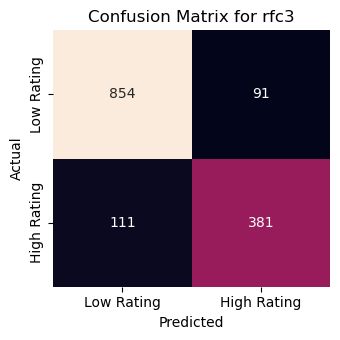

In [210]:
cm3 = confusion_matrix(y_test_class, y_pred_rfc3)
plt.figure(figsize=(3.5,3.5))
sns.heatmap(cm3, annot=True, fmt='g', cbar=False,
xticklabels=class_labels,
yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for rfc3')
plt.show()

This model is the most accurate so far but only by a slight margin. It has a prediction accuracy of 85.94%

**Save the Model**

In [211]:
joblib.dump(rfc3, 'models/rfc3.pkl')

['models/rfc3.pkl']

#### <span style="color:darkblue">Classification Model 4 - Multi Layer Peceptron</span> 
A default Random Forest model will be configured to predict the classification target variable of rating_class.

**Create the model**

In [212]:
# Import the model
from sklearn.neural_network import MLPClassifier

In [213]:
# Create an instance of the Multi Layer Perceptron model.
mlp44 = MLPClassifier(random_state=0)

# View the default parameters
mlp44.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**Perform a gridsearch and tune the hyperparameters**

**Parameters setup:**<br>
Three kernels are chosen and various hyperparameters pertaining to them will be tested to determine what is the optimum combination of settings for this dataset.

In [214]:
# Define which hyperparameters will be used in the grid search.
params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (200, 200)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [215]:
# Define the randomized search

# set up cross validation to split into 10 folds. Repeat once
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)

# Load the model and all parameters into the randomized search.
rs4 = RandomizedSearchCV(estimator=mlp44, param_distributions=params, n_iter=50, 
                         cv=cv, scoring='accuracy', random_state=0)


In [216]:
# get the start time
st = time.time()

# Test and fit the grid search options to the training data.
rs4.fit(X_train_class, y_train_class)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print(str(round(elapsed_time,2)) + " seconds")

2549.93 seconds


**Display the best hyperparameter settings**

In [217]:
print("Best Hyper Parameters:", rs4.best_params_)

Best Hyper Parameters: {'solver': 'adam', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'logistic'}


**Calculate the metrics**

In [218]:
# Summarize the results
print("Best: %f using %s" % (rs4.best_score_, rs4.best_params_))
means = rs4.cv_results_['mean_test_score']
stds = rs4.cv_results_['std_test_score']
params = rs4.cv_results_['params']

Best: 0.879241 using {'solver': 'adam', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'logistic'}


**Predict the classifications on the test set**

In [219]:
mlp4 = rs4.best_estimator_

In [220]:
y_pred_mlp4=mlp4.predict(X_test_class)

**Display accuracy, precision and recall on the test set**

In [221]:
print("Accuracy:",round(metrics.accuracy_score(y_test_class, y_pred_mlp4),5))
print("Precision:",round(metrics.precision_score(y_test_class, y_pred_mlp4, average = 'weighted'),5))
print("Recall:",round(metrics.recall_score(y_test_class, y_pred_mlp4, average = 'weighted'),5))
print("F1-score:",round(metrics.f1_score(y_test_class, y_pred_mlp4, average = 'weighted'),5))

Accuracy: 0.85317
Precision: 0.8514
Recall: 0.85317
F1-score: 0.85136


**Display the classification report for LogReg1**

In [222]:
class_labels = ['Low Rating', 'High Rating']

print("Classification Report:")
print(classification_report(y_test_class, y_pred_mlp4, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

  Low Rating       0.87      0.91      0.89       945
 High Rating       0.81      0.74      0.78       492

    accuracy                           0.85      1437
   macro avg       0.84      0.83      0.83      1437
weighted avg       0.85      0.85      0.85      1437



**Display the Confusion Matrix**

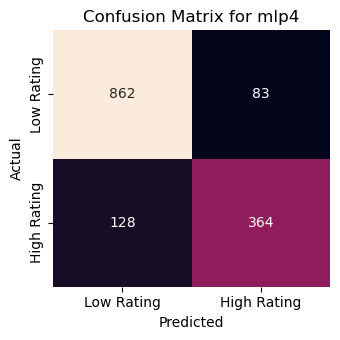

In [223]:
cm4 = confusion_matrix(y_test_class, y_pred_mlp4)
plt.figure(figsize=(3.5,3.5))
sns.heatmap(cm4, annot=True, fmt='g', cbar=False,
xticklabels=class_labels,
yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for mlp4')
plt.show()

This model has an overall accuracy of 85.32%. It is not as good as RFC3 which has a prediction accuracy of 85.94%

**Save the Model**

In [224]:
joblib.dump(mlp4, 'models/mlp4.pkl')

['models/mlp4.pkl']

#### <span style="color:darkblue">Classification Model Evaluation</span> 

In [225]:
# Create a dictionary to store results for each model
class_results = {
    'Model': ['LogReg1', 'SVC2', 'RFC3', 'MLP4'],
    'Accuracy': [
        round(metrics.accuracy_score(y_test_class, y_pred_LogReg1),5),
        round(metrics.accuracy_score(y_test_class, y_pred_svc2),5),
        round(metrics.accuracy_score(y_test_class, y_pred_rfc3),5),
        round(metrics.accuracy_score(y_test_class, y_pred_mlp4),5)
    ],
    'Precision (weighted)': [
        round(metrics.precision_score(y_test_class, y_pred_LogReg1, average = 'weighted'),5),
        round(metrics.precision_score(y_test_class, y_pred_svc2, average = 'weighted'),5),
        round(metrics.precision_score(y_test_class, y_pred_rfc3, average = 'weighted'),5),
        round(metrics.precision_score(y_test_class, y_pred_mlp4, average = 'weighted'),5)
    ],
    'Recall (weighted)': [
        round(metrics.recall_score(y_test_class, y_pred_LogReg1, average = 'weighted'),5),
        round(metrics.recall_score(y_test_class, y_pred_svc2, average = 'weighted'),5),
        round(metrics.recall_score(y_test_class, y_pred_rfc3, average = 'weighted'),5),
        round(metrics.recall_score(y_test_class, y_pred_mlp4, average = 'weighted'),5)
    ],
    'F1-Score (weighted)': [
        round(metrics.f1_score(y_test_class, y_pred_LogReg1, average = 'weighted'),5),
        round(metrics.f1_score(y_test_class, y_pred_svc2, average = 'weighted'),5),
        round(metrics.f1_score(y_test_class, y_pred_rfc3, average = 'weighted'),5),
        round(metrics.f1_score(y_test_class, y_pred_mlp4, average = 'weighted'),5)
    ]
}

# Create a DataFrame to display the results
df_class_results = pd.DataFrame(class_results)

# Round the results to 6 decimal places
df_class_results = df_class_results.round(6)

# Display the results for the four models
df_class_results


Model  Accuracy  Precision (weighted)  Recall (weighted)  \
0  LogReg1   0.85177               0.85001            0.85177   
1     SVC2   0.85456               0.86294            0.85456   
2     RFC3   0.85943               0.85835            0.85943   
3     MLP4   0.85317               0.85140            0.85317   

   F1-Score (weighted)  
0              0.85013  
1              0.85661  
2              0.85871  
3              0.85136

Looking at the table, all four models performed very similarly, however the random forest classifier has the best overall accuracy of 85.94% followed by the support vector machine at 85.46%. The SVM has the highest precision but the RFC won on all the other metrics.

All the metrics were calculated by using weighted average which takes into account the class imbalance. Looking below, class 1 (Low Rating) is 65% of all the dataset and class 2 (High Rating) is 34%. This is not a huge imbalance but it is still better to use weighted average.

In this dataset, which is reasonably balanced and precision and recall are not critical, overall accuracy would be the most important measure. 

To conclude, all models perform very similar but the random forest classifier is the best.

In [226]:
X_train['rating_class'].value_counts(), X_test['rating_class'].value_counts()

(1    3765
 2    1982
 Name: rating_class, dtype: int64,
 1    945
 2    492
 Name: rating_class, dtype: int64)

In [227]:
X_train['rating_class'].value_counts(1), X_test['rating_class'].value_counts(1)

(1    0.655124
 2    0.344876
 Name: rating_class, dtype: float64,
 1    0.65762
 2    0.34238
 Name: rating_class, dtype: float64)

In [228]:
# Save the dataframe as a CSV file
df_class_results.to_csv('Classification_Summary.csv', index=False)